In [1]:
# import libraries

# import pygwalker as pyg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read in the data
data_file = pd.read_csv("census13.csv")

# view the first five rows in the dataset
data_file.head()

House Number       Street First Name         Surname   Age  \
0             1  Garner Fork    Carolyn          Murray  52.0   
1             1  Garner Fork       Kyle          Murray  53.0   
2             1  Garner Fork    Suzanne  Elliott-Murray  24.0   
3             2  Garner Fork      Naomi          Archer  34.0   
4             2  Garner Fork     Martin          Barnes  36.0   

  Relationship to Head of House Marital Status  Gender             Occupation  \
0                          Head        Married  Female                   Copy   
1                       Husband        Married    Male    Immigration officer   
2                      Daughter         Single  Female  Merchant navy officer   
3                          Head         Single  Female  Merchant navy officer   
4                       Partner         Single    Male         Futures trader   

  Infirmity   Religion  
0      None  Methodist  
1      None  Methodist  
2      None  Methodist  
3      None       None  
4      None       None

From the first five rows in the dataset, we see that the occupation in the first row is entered as "Copy" which is not a valid occupation. The `Occupation` column will be investigated.

In [3]:
# Display the last five rows in the dataset
data_file.tail()

House Number           Street First Name    Surname   Age  \
8873             1  Price Institute      Wendy    Farrell  38.0   
8874             1  Price Institute     Graham    Farrell   2.0   
8875             1  Price Institute      Janet       Dean  39.0   
8876             1  Price Institute    Shirley      Smith  63.0   
8877             1  Price Institute       Neil  Wilkinson  51.0   

     Relationship to Head of House Marital Status  Gender  \
8873                          Head         Single  Female   
8874                           Son            NaN    Male   
8875                        Cousin         Single  Female   
8876                       Sibling       Divorced  Female   
8877                        Lodger       Divorced    Male   

               Occupation Infirmity   Religion  
8873           Unemployed      None     Muslim  
8874                Child      None        NaN  
8875                 Make      None       None  
8876  Art gallery manager      None  Methodist  
8877   Surveyor, minerals      None  Christian

From the last five rows in the dataset, we see that the occupation in row index "8875" is entered as "Make" which is not a valid occupation. The Occupation column will be investigated. 

In the religion column, we see that Wendy Farell is a Muslim while her son Graham Farell who is two years of age has an entry of "NaN" as his religion, Graham has the same surname entry as his mom, and her marital status says single, therefore it's likely that Wendy is raising Graham on her own without his biological father, therefore she's most likely to raise him in the same religion as her's. Investigation will be done on all the columns to determine what decisions to make in situations like Wendy's and her son

In [4]:
# Display five rows at random
data_file.sample(5)

House Number              Street First Name      Surname   Age  \
5584            84    Edinburgh Points     Joanna        Allan  76.0   
593            118        Baker Branch       Katy        Green  51.0   
6367            23        Sydney Drive    Barbara       Davies  68.0   
2787             7      Clark Crescent       Emma         Hunt  77.0   
8554             4  Mermaidpush Street   Michelle  Glover-Kemp  73.0   

     Relationship to Head of House Marital Status  Gender  \
5584                          Head       Divorced  Female   
593                           Head         Single  Female   
6367                          Head        Married  Female   
2787                          Head        Married  Female   
8554                          Head        Married  Female   

                            Occupation Infirmity   Religion  
5584      Retired Commissioning editor      None  Christian  
593   Accountant, chartered management      None   Catholic  
6367       Retired Information officer      None       None  
2787  Retired Counselling psychologist      None     Jewish  
8554                        Unemployed      None  Methodist

In [5]:
# check for the shape of the data
data_file.shape

(8878, 11)

There are eight thousand eight hundred and seventy eight rows and eleven columns in the dataset

In [6]:
# check for the overview info about the data
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   8878 non-null   int64  
 1   Street                         8878 non-null   object 
 2   First Name                     8878 non-null   object 
 3   Surname                        8878 non-null   object 
 4   Age                            8878 non-null   float64
 5   Relationship to Head of House  8878 non-null   object 
 6   Marital Status                 6911 non-null   object 
 7   Gender                         8878 non-null   object 
 8   Occupation                     8878 non-null   object 
 9   Infirmity                      8878 non-null   object 
 10  Religion                       6857 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 763.1+ KB


The information above shows
- There are 8878 rows and 11 columns
- Age datatype is "float" instead of "int"
- Columns with missing values: Marital Status and Religion

Checking for the actual number of missing values in Marital Status and Religion

In [7]:
# check for the sum of null entries in each column
data_file.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1967
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2021
dtype: int64

There are 1967 missing values in Marital Status and there are 2021 rows missing in Religion

In [8]:
# check the names of the columns in the data
data_file.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [9]:
# create a copy of the dataset
data_file_copy = data_file[:]

In [10]:
# set the row and column display to unlimited
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

<center> <h1>  DATA CLEANING </h1> </center>

# Treating the Age Column
Investigate the problem with the Age column.
Was there any row(s) that caused the change in the data type?
Or were all Age row entries floats?

In [11]:
# check the datatypes of the entries in the "Age" column
data_file["Age"].dtypes

dtype('float64')

In [12]:
# confirm all entries in the "Age" column are of type "float"
for age in data_file["Age"]:
    try:
        assert type(age) == float
        
    except AssertionError:
        print("This entry is the 'Age' column is not a float")

In [13]:
# Checking the summary statistics of "Age" in the dataset
data_file["Age"].describe()

count    8878.000000
mean       37.104561
std        21.961020
min         0.000000
25%        19.000000
50%        36.000000
75%        53.000000
max       105.000000
Name: Age, dtype: float64

The minimum entry for Age is zero which are most likely babies, the rows with age entries as zero can be futher investigated for clarity. 

In [14]:
# checking for age samples for 0 randomly
data_file[data_file["Age"]== 0].sample(20)

House Number              Street First Name          Surname  Age  \
3402            99     Castorshy Drive       Dawn          Edwards  0.0   
2839            22      Clark Crescent     Jeremy            Nixon  0.0   
3216            45     Castorshy Drive    Melanie              Fox  0.0   
964             27         Mary Center      Lynda             King  0.0   
5267             6       Bulldog Drive     Andrea           Martin  0.0   
2612            10          Kelly Lane       Karl  Freeman-Johnson  0.0   
6316             6        Sydney Drive      Julie             Cole  0.0   
4781             7    Wheeler Crescent     Joshua            Bates  0.0   
6866            67     Summer Villages   Caroline            White  0.0   
4628            30      Swansea Stream      Alice    Russell-Mills  0.0   
6814            46     Summer Villages  Stephanie  Newton-Shepherd  0.0   
8541            22     Morgan Crescent     Jordan             Ward  0.0   
6867            67     Summer Villages     Leanne            White  0.0   
5982            30       James Station      Jamie   Sullivan-Smith  0.0   
4390            32        Cardiff Lane     Hannah           Porter  0.0   
4668            42      Swansea Stream   Benjamin           Walker  0.0   
975             30         Mary Center     Joshua           Brooks  0.0   
8562             6  Mermaidpush Street      Jamie           Hughes  0.0   
7884            42     Coconutbow Lane  Geraldine           Fowler  0.0   
2358            93          Gray Brook        Zoe         Williams  0.0   

     Relationship to Head of House Marital Status  Gender Occupation  \
3402                      Daughter            NaN  Female      Child   
2839                           Son            NaN    Male      Child   
3216                      Daughter            NaN  Female      Child   
964                       Daughter            NaN  Female      Child   
5267                      Daughter            NaN  Female      Child   
2612                           Son            NaN    Male      Child   
6316                      Daughter            NaN  Female      Child   
4781                           Son            NaN    Male      Child   
6866                      Daughter            NaN  Female      Child   
4628                      Daughter            NaN  Female      Child   
6814                      Daughter            NaN  Female      Child   
8541                           Son            NaN    Male      Child   
6867                      Daughter            NaN  Female      Child   
5982                           Son            NaN    Male      Child   
4390                      Daughter            NaN  Female      Child   
4668                           Son            NaN    Male      Child   
975                            Son            NaN    Male      Child   
8562                           Son            NaN    Male      Child   
7884                      Daughter            NaN  Female      Child   
2358                      Daughter            NaN  Female      Child   

     Infirmity Religion  
3402      None      NaN  
2839      None      NaN  
3216      None      NaN  
964       None      NaN  
5267      None      NaN  
2612      None      NaN  
6316      None      NaN  
4781      None      NaN  
6866      None      NaN  
4628      None      NaN  
6814      None      NaN  
8541      None      NaN  
6867      None      NaN  
5982      None      NaN  
4390      None      NaN  
4668      None      NaN  
975       None      NaN  
8562      None      NaN  
7884      None      NaN  
2358      None      NaN

From the entries above, it is obvious that there's nothing wrong with entries of 0 as age.

All entries for Marital status show child and should be changed to minor for non-adults. The religion show that all entries were NaN (or empty), this should also be changed to either to `undecided` or `unknown` or inferred from the parents.

A maximum age of 105 is not very common but happens, Let's check if there are many entries above 90yrs

In [15]:
# checking for age entries from 90 and above
data_file[data_file["Age"]>= 90]

House Number             Street First Name   Surname    Age  \
620            136       Baker Branch   Georgina  Marshall  105.0   
698            187       Baker Branch    Heather    Newton   90.0   
1057            61        Mary Center       Gail     Smith   95.0   
1144            97        Mary Center     Hilary    Powell  103.0   
1145            97        Mary Center       Sean    Powell  105.0   
1181             6      Parker Avenue        Joe  Harrison   96.0   
1182             6      Parker Avenue        Kim  Harrison   93.0   
1383            44  Zebratraps Avenue    Gillian      Carr   92.0   
1384            44  Zebratraps Avenue  Alexander      Carr   94.0   
1609            14      Brooks Ridges       Marc    Clarke   90.0   
2034            26         Moore Spur     Janice    Browne  103.0   
2072             4     Calendar Coves      Alice     Lewis  100.0   
2227            12         Gray Brook    Vincent  Phillips  100.0   
2228            12         Gray Brook     Sheila  Phillips   98.0   
2298            56         Gray Brook      Lewis    Hunter   91.0   
2320            70         Gray Brook     Nicola    Clarke   90.0   
2375           105         Gray Brook     Kieran     Henry   90.0   
2901            11      Vaughan Light     Darren     Jones   90.0   
3712             1    Houghton Circle   Jennifer     Evans   94.0   
3713             1    Houghton Circle      Nigel     Evans   94.0   
3757            16    Houghton Circle   Rosemary    Rowley   96.0   
3758            16    Houghton Circle  Christian    Rowley   98.0   
3770            22    Houghton Circle       Marc   Edwards  104.0   
3771            22    Houghton Circle   Patricia   Edwards  102.0   
5009            17         Brown Road     Gordon     Smith   98.0   
5247            21       Green Corner    Timothy   Simpson   96.0   
5442             2        Savage Lane      Derek    Graham   93.0   
5526            51   Edinburgh Points       Jane     Smith  101.0   
5586            86   Edinburgh Points      Ellie     Blake  101.0   
5606            99   Edinburgh Points    Shannon   Jackson   93.0   
5617           107   Edinburgh Points    Stephen   Spencer  105.0   
5717           166   Edinburgh Points    Harriet     Nixon  103.0   
5718           166   Edinburgh Points   Mohammed     Nixon  101.0   
5839             6      James Station   Lawrence      Hill   98.0   
5840             6      James Station   Jennifer      Hill   98.0   
5933            25      James Station     Joanne  Thompson   96.0   
5934            25      James Station       Dale  Thompson   99.0   
6041            37      James Station      Abdul   Douglas   92.0   
6089            23   Aethelred Corner      Lynne    Taylor   99.0   
6090            23   Aethelred Corner      Barry    Taylor  101.0   
6144            20     William Drives    Mohamed      Rose   90.0   
6151            23     William Drives      Allan  Bradshaw  102.0   
6264            12         Unity Lane      Chloe   Johnson   91.0   
6265            12         Unity Lane     Gareth   Johnson   91.0   
7157           173    Summer Villages    Timothy   Wallace   93.0   
7358             4       Moore Island    Suzanne   Brennan  102.0   
7455            63       Moore Island     Graeme   Collins   99.0   
7569           128       Moore Island      Alice    Archer  104.0   
7676            20       Begum Ridges     Jordan     Jones   96.0   
8357             1    September Trace    Charles     Jones   96.0   
8358             1    September Trace      Megan     Jones   94.0   
8451            11   Blackdike Street    Bradley  Harrison   90.0   
8500             3    Morgan Crescent   Mitchell     Baker   93.0   
8649             1     Webster Spring       Carl    Powell   99.0   
8650             1     Webster Spring     Janice    Powell   96.0   

     Relationship to Head of House Marital Status  Gender  \
620                           Head        Widowed  Female   
698                

In [16]:
# checking for the number age entries from 90 and above
data_file[data_file["Age"]>= 90].shape[0]

55

<AxesSubplot:>

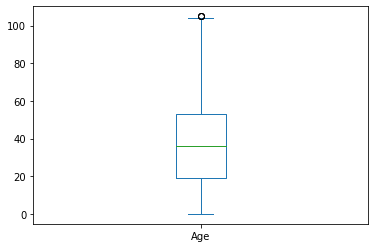

In [17]:
#Checking if there are any possible outliers
data_file["Age"].plot(kind = 'box')

The data for age entries for 90 and above is 55 which isn't too high. Nothing seems wrong, the single and divorced people (90 and above) are all heads of the house which is expected while married people are head or spouses of the heads.

In [18]:
# change Age datatype to int
data_file['Age'] = data_file['Age'].astype('int')

# Treating Marital Status
Investigate the row entries with missing values for Marital Status

In [19]:
# checking for the categories in Marital Status
data_file['Marital Status'].unique()

array(['Married', 'Single', 'Divorced', 'Widowed', nan, ' '], dtype=object)

In [20]:
# checking for the count of each unique entry (including nan) in Marital Status
data_file['Marital Status'].value_counts(dropna=False)

Single      3095
Married     2551
NaN         1967
Divorced     861
Widowed      403
               1
Name: Marital Status, dtype: int64

In [21]:
# check the blank (empty string " ") in the Marital Status column
data_file[data_file['Marital Status'] ==' ']

House Number         Street First Name Surname  Age  \
1966            57  Tamarisk Road      James  Parker   54   

     Relationship to Head of House Marital Status Gender  \
1966                       Husband                  Male   

                              Occupation Infirmity Religion  
1966  Surveyor, planning and development      None     None

From the row displayed above, it shows that the person whose entry for Marital Status was a string is the husband of the head of the house. Confirm that it's true by looking at the head of the house for `57 Tamarisk Road` to infer. 

Checks rows within the 1964 and 1969, the head of house detail will most likely fall there

In [22]:
# check rows 1961 to 1971
data_file.iloc[1964:1969 , :]

House Number         Street First Name   Surname  Age  \
1964            56  Tamarisk Road      Peter  Williams   28   
1965            57  Tamarisk Road      Molly    Parker   51   
1966            57  Tamarisk Road      James    Parker   54   
1967            57  Tamarisk Road     Sheila    Parker   11   
1968            58  Tamarisk Road  Katherine      Cook   54   

     Relationship to Head of House Marital Status  Gender  \
1964                           Son       Divorced    Male   
1965                          Head        Married  Female   
1966                       Husband                   Male   
1967                      Daughter            NaN  Female   
1968                          Head         Single  Female   

                              Occupation Infirmity   Religion  
1964                   Fisheries officer      None       None  
1965                         Optometrist      None       None  
1966  Surveyor, planning and development      None       None  
1967                             Student      None        NaN  
1968                          Unemployed      None  Christian

From the rows above, it is obvious that the Marital Status entry for `James Parker` should have been married instead of an empty string. 

In [23]:
# correcting the Marital Status entry for "James Parker"
data_file['Marital Status'].replace(' ','Married',inplace=True)

In [24]:
# check the corrected row
data_file.iloc[1966]

House Number                                                     57
Street                                                Tamarisk Road
First Name                                                    James
Surname                                                      Parker
Age                                                              54
Relationship to Head of House                               Husband
Marital Status                                              Married
Gender                                                         Male
Occupation                       Surveyor, planning and development
Infirmity                                                      None
Religion                                                       None
Name: 1966, dtype: object

In [25]:
# check the unique counts of Marital Status to see that " " is not there again
data_file["Marital Status"].value_counts(dropna=False)

Single      3095
Married     2552
NaN         1967
Divorced     861
Widowed      403
Name: Marital Status, dtype: int64

 **Checking for rows with missing values in Marital status**

In [26]:
# check 20 random samples of missing entries for Marital Status
data_file[data_file['Marital Status'].isnull()].sample(20)

House Number              Street First Name          Surname  Age  \
6327             9        Sydney Drive    Melanie           Ashton    2   
3686             6      Marshall Inlet  Christian            Clark   10   
2508            25      Smith Crescent      Craig   Hale-Patterson   16   
4991             5          Brown Road     Sharon           Thomas    9   
4228            37   Butler Extensions    Mohamed           Sharpe    4   
1256            35       Parker Avenue    Rachael            Davis    3   
8010            23        Newport Lane     Rachel            Jones    4   
1107            81         Mary Center      Robin         Robinson    8   
1668             2          White Ramp        Guy           Brooks    3   
8030            29        Newport Lane   Danielle             Ball    7   
4168            11   Butler Extensions     Brenda        Humphreys   11   
3165            32     Castorshy Drive       Ruth         Lawrence   13   
382             31   Apricotbox Avenue    Jeffrey            Patel    8   
5972            28       James Station      Glenn            James   12   
733              9       Dublin Points      Jamie            Wells    7   
3515           129     Castorshy Drive     Gordon  Williams-Turner   11   
8267            14  Johnston Underpass     Marcus          Edwards   10   
3447           112     Castorshy Drive      Ricky          Hartley   11   
5045            10       Bright Avenue     Steven          Collins    7   
988             36         Mary Center    Bradley           Holmes   12   

     Relationship to Head of House Marital Status  Gender Occupation  \
6327                      Daughter            NaN  Female      Child   
3686                      Grandson            NaN    Male    Student   
2508                           Son            NaN    Male    Student   
4991                      Daughter            NaN  Female    Student   
4228                      Grandson            NaN    Male      Child   
1256                      Daughter            NaN  Female      Child   
8010                      Daughter            NaN  Female      Child   
1107                           Son            NaN    Male    Student   
1668                           Son            NaN    Male      Child   
8030                      Daughter            NaN  Female    Student   
4168                 Step-Daughter            NaN  Female    Student   
3165                      Daughter            NaN  Female    Student   
382                            Son            NaN    Male    Student   
5972                           Son            NaN    Male    Student   
733                            Son            NaN    Male    Student   
3515                           Son            NaN    Male    Student   
8267                           Son            NaN    Male    Student   
3447                           Son            NaN    Male    Student   
5045                           Son            NaN    Male    Student   
988                            Son            NaN    Male    Student   

     Infirmity Religion  
6327      None      NaN  
3686      None      NaN  
2508      None      NaN  
4991      None      NaN  
4228      None      NaN  
1256      None      NaN  
8010      None      NaN  
1107      None      NaN  
1668      None      NaN  
8030      None      NaN  
4168      None      NaN  
3165      None      NaN  
382       None      NaN  
5972      None      NaN  
733       None      NaN  
3515      None      NaN  
8267      None      NaN  
3447      None      NaN  
5045      None      NaN  
988       None      NaN

It seems Marital Status is empty for people that age is less than 18 and Relationship with Head of House is ether Daughter or Son. Investigate whether null entries on Marital Status were listed for adults.

<AxesSubplot:xlabel='Marital Status', ylabel='Age'>

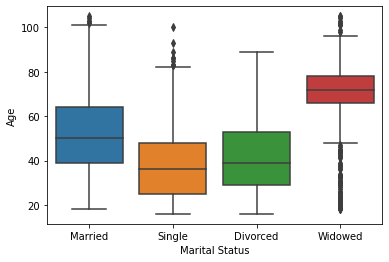

In [27]:
# plot box-plot considering age
sns.boxplot(x="Marital Status", y="Age", data=data_file)

The points showing as outliers can be ignored because while it is not common, it is not impossible to still be married after 100, Single after 80 and widowed before 50.

In [28]:
# check if there is anyone of age 18 and above and has no marital status
data_file[(data_file["Age"]>=18) & (data_file["Marital Status"].isnull())]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [29]:
# check if all the null values come from ages less than 18 
data_file[(data_file["Age"]<18) & (data_file["Marital Status"].isnull())].shape[0]

1967

From the result above, It has been confirmed that no one within and above 18 years is nan. Replace these null entries with `minor` since the legal age for marriage is 18. 

In [30]:
# replace the null entries in Marital Status
data_file["Marital Status"].replace(np.nan, "Minor", inplace = True)

In [31]:
# Checking to see null entries are cleaned
data_file[data_file['Marital Status'].isnull()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [32]:
# Checking to see null entries are cleaned
data_file["Marital Status"].isnull().sum()

0

In [33]:
# checking to see null entries have been repalced with "Minor"
data_file["Marital Status"].value_counts(dropna=False)

Single      3095
Married     2552
Minor       1967
Divorced     861
Widowed      403
Name: Marital Status, dtype: int64

Further investigation can be made on the marital status with age to ensure accurate data.

In [34]:
#Checking if there are under 18 individuals that are not single?
data_file[(data_file['Age']<18) & (data_file['Marital Status'] != 'Minor')]

House Number         Street First Name   Surname  Age  \
1803            54    Foster Cove     Amanda    Murray   16   
1975            60  Tamarisk Road    Shirley  Gardiner   17   
2245            26     Gray Brook      Diane    Thomas   16   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1803                          Head       Divorced  Female  Unemployed   
1975                          Head         Single  Female  Unemployed   
2245                          Head         Single  Female  Unemployed   

     Infirmity Religion  
1803      None      NaN  
1975      None      NaN  
2245      None      NaN

In the United Kingdom, people that are 16 and 17 olds are no longer allowed to get married regardless of the circumstance. They will be replaced to Minor. The Relationship to Head of House entries as head is also unlikely will be addressed later.

In [35]:
#REplacing Divorced with Single Minor
data_file.iloc[1803,6] = 'Minor'
data_file.iloc[1975,6] = 'Minor'
data_file.iloc[2245,6] = 'Minor'

<AxesSubplot:xlabel='Marital Status', ylabel='Age'>

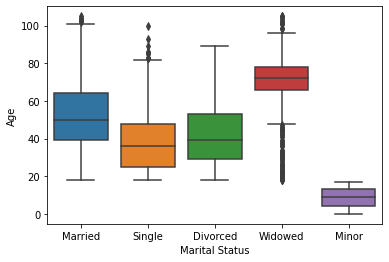

In [36]:
# plot box-plot considering age after cleaning
sns.boxplot(x="Marital Status", y="Age", data=data_file)

**The Marital Status has been fixed**

# Treating the Gender

In [37]:
# checking for the unique gender
data_file["Gender"].unique()

array(['Female', 'Male', ' '], dtype=object)

In [38]:
# checking that there are no null/NaN entries
data_file[data_file["Gender"].isnull()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

In [39]:
# checking that there are no null/NaN entries
data_file["Gender"].isnull().sum()

0

In [40]:
# check to see empty string entry or entries
data_file[data_file["Gender"]==' ']

House Number         Street First Name   Surname  Age  \
5059            14  Bright Avenue        Jay    Sharpe    6   
5164            49  Bright Avenue   Mohammed  Williams   20   

     Relationship to Head of House Marital Status Gender          Occupation  \
5059                           Son          Minor                    Student   
5164                           Son       Divorced         University Student   

     Infirmity Religion  
5059      None      NaN  
5164      None     None

In [41]:
# The empty strings are both sons, replace them with male
data_file["Gender"].replace(' ','Male', inplace=True)

In [42]:
# check if the correction is now reflected
data_file[data_file["Gender"]==' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

**Gender is fixed**

# Treating the Occupation

In [43]:
# check for the unique occupation
data_file["Occupation"].unique()

array(['Copy', 'Immigration officer', 'Merchant navy officer', ...,
       'Retired Transport planner', 'Retired Multimedia programmer',
       'Retired Animal nutritionist'], dtype=object)

In [44]:
#How many unique Occupations are there
len(data_file["Occupation"].unique())

1126

1126 unique occupations will be cumbersome to look through but we have to check to see if there are any invalid Occupations that shouldn't be here like the first occupation Copy which is incorrect

In [45]:
# confirm there are no NaN entries for the Occupation
data_file["Occupation"].isnull().sum()

0

In [46]:
#checking for empty strings
data_file[data_file["Occupation"] == ' ']

House Number            Street First Name Surname  Age  \
5662           133  Edinburgh Points     Lesley   Green   71   
8519            13   Morgan Crescent     Steven  Norman   46   

     Relationship to Head of House Marital Status  Gender Occupation  \
5662                          Head        Married  Female              
8519                       Partner         Single    Male              

     Infirmity   Religion  
5662      None  Christian  
8519      None       None

In [47]:
#the 71 year old individual should be retired and the 46  year old employment is unknown
data_file.iloc[5662, 8]='Retired'
data_file.iloc[8519, 8]='Unknown'

Some Invalid Occupations have been noted like 'Copy' and 'Make' and need to be replaced

In [48]:
# check the entries where Occupation is Copy
data_file[data_file["Occupation" ]=='Copy']

House Number             Street First Name  Surname  Age  \
0                1        Garner Fork    Carolyn   Murray   52   
13               7        Garner Fork      Carol     Ward   45   
306             20  Apricotbox Avenue       Kyle  Carroll   37   
911              8        Mary Center      Garry  Simpson   58   
4911            41   Wheeler Crescent    Anthony   Wright   37   
6129            13     William Drives    Lindsey    Moore   27   
6667            48        Iris Street    Patrick   Cooper   44   

     Relationship to Head of House Marital Status  Gender Occupation  \
0                             Head        Married  Female       Copy   
13                            Head        Married  Female       Copy   
306                           None         Single    Male       Copy   
911                           None         Single    Male       Copy   
4911                        Lodger         Single    Male       Copy   
6129                        Lodger         Single  Female       Copy   
6667                          Head         Single    Male       Copy   

     Infirmity   Religion  
0         None  Methodist  
13        None       None  
306       None  Christian  
911       None  Methodist  
4911      None       None  
6129      None       None  
6667      None       None

In [49]:
#None of the ages are above 65 or below 18 so they are replaced with unknown
data_file['Occupation'].replace('Copy', 'Unknown', inplace = True)

In [50]:
# check the entries where Occupation is Make
data_file[data_file["Occupation" ]=='Make']

House Number              Street First Name Surname  Age  \
53               7          Beech Lake     Adrian  Foster   58   
568            102        Baker Branch     Philip  Wilson   23   
1574            52       Myers Corners     Joseph   Owens   64   
1694             9         Foster Cove       June    Wong   62   
1866            21       Tamarisk Road  Charlotte   Begum   57   
3795             9  Gwyneddbind Street      Fiona    Cook   37   
4093             8          Peel Cliff     Sheila    Ford   48   
5365            31       Bulldog Drive     Hayley   Patel   52   
8875             1     Price Institute      Janet    Dean   39   

     Relationship to Head of House Marital Status  Gender Occupation  \
53                            Head         Single    Male       Make   
568                           Head       Divorced    Male       Make   
1574                          None         Single    Male       Make   
1694                          Head         Single  Female       Make   
1866                          Head         Single  Female       Make   
3795                          Head         Single  Female       Make   
4093                          Head        Married  Female       Make   
5365                          Head        Married  Female       Make   
8875                        Cousin         Single  Female       Make   

     Infirmity   Religion  
53        None       None  
568       None       None  
1574      None  Methodist  
1694      None       None  
1866      None  Christian  
3795      None   Catholic  
4093      None   Catholic  
5365      None  Christian  
8875      None       None

In [51]:
#replace the Make occupation with Unknown
data_file['Occupation'].replace('Make', 'Unknown', inplace=True)

In [52]:
# check the entries where Occupation is Child
data_file[data_file["Occupation" ]=='Child'].head()

House Number             Street First Name         Surname  Age  \
55              1           Todd Row      Megan         Jackson    4   
62              3           Todd Row       Anna  Walker-Simpson    1   
200             5  Apricotbox Avenue        Sam          Coates    4   
201             5  Apricotbox Avenue     Gordon          Coates    0   
208             7  Apricotbox Avenue     Joseph            Ward    0   

    Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
55                       Daughter          Minor  Female      Child      None   
62                       Daughter          Minor  Female      Child      None   
200                           Son          Minor    Male      Child      None   
201                           Son          Minor    Male      Child      None   
208                           Son          Minor    Male      Child      None   

    Religion  
55       NaN  
62       NaN  
200      NaN  
201      NaN  
208      NaN

In [53]:
#What's the maximum age for child to be an occupation?
data_file[data_file["Occupation" ]=='Child']['Age'].max()

4

In [54]:
#Then what about 5 - 10 year olds?
data_file[(data_file['Age' ]>4) & (data_file['Age']<11)].sample()

House Number      Street First Name Surname  Age  \
4098             9  Peel Cliff      Abbie  Thomas    8   

     Relationship to Head of House Marital Status  Gender Occupation  \
4098                      Daughter          Minor  Female    Student   

     Infirmity Religion  
4098      None      NaN

5 - 10 year olds are students which makes sense and brings up the issue of whether the type of students should be noted especially as we are dealing with Uni students too

In [55]:
#Let's look at all the records of students 
data_file[data_file['Occupation'].str.contains('student',case=False)]

House Number               Street   First Name                 Surname  \
12               6          Garner Fork         Luke             Stone-Marsh   
32               1      Brightloop Lane        Kevin                  Davies   
34               2      Brightloop Lane     Kayleigh                   Jones   
44               1           Beech Lake         Rhys                 Skinner   
47               3           Beech Lake         Tony                  Morris   
48               3           Beech Lake         Gail                  Horton   
49               3           Beech Lake        Shane                   White   
60               3             Todd Row        Marie                 Simpson   
61               3             Todd Row        Karen          Walker-Simpson   
73               1      Goodluck Avenue        Grace                   Evans   
75               2      Goodluck Avenue       Kieran                 Edwards   
81               6      Goodluck Avenue      Pauline                Reynolds   
83               7      Goodluck Avenue    Alexandra                 Jackson   
86               8      Goodluck Avenue       Sandra             Watson-Todd   
90              11      Goodluck Avenue        Aaron                   Allen   
91              11      Goodluck Avenue        Julia                   Allen   
92              11      Goodluck Avenue        Colin                   Allen   
99              16      Goodluck Avenue         Alex                Reynolds   
100             16      Goodluck Avenue       Donald                Reynolds   
102             17      Goodluck Avenue         Gary                    Kirk   
103             17      Goodluck Avenue      Harriet                   Ellis   
104             17      Goodluck Avenue        Clare                   Ellis   
129             34      Goodluck Avenue    Christian               Sanderson   
130             35      Goodluck Avenue       Eileen                 Simpson   
133             36      Goodluck Avenue        Roger                Thompson   
134             36      Goodluck Avenue         Joan                Thompson   
139             40      Goodluck Avenue        Joyce                  Robson   
140             40      Goodluck Avenue       Elaine                 Bennett   
160             55      Goodluck Avenue        Abdul                   Baker   
161             55      Goodluck Avenue         Lucy            Briggs-Baker   
162             56      Goodluck Avenue       Ronald                  Wilson   
168             60      Goodluck Avenue     Caroline                   Baker   
171             62      Goodluck Avenue        Wayne                  Stokes   
172             62      Goodluck Avenue      Stewart                  Stokes   
182              2    Apricotbox Avenue       Lesley                    Khan   
183              2    Apricotbox Avenue        Jason                    Khan   
184              2    Apricotbox Avenue          Sam                    Khan   
185              2    Apricotbox Avenue      Bernard                    Khan   
186              2    Apricotbox Avenue     Samantha                    Khan   
192              4    Apricotbox Avenue      Natasha                   Smart   
193              4    Apricotbox Avenue        Denis                 Hussain   
194              4    Apricotbox Avenue        James                   Coles   
195              4    Apricotbox Avenue      Dorothy                O'Connor   
196              4    Apricotbox Avenue      Charlie               Nicholson   
198              5    Apricotbox Avenue        Reece                  Coates   
199              5    Apricotbox Avenue       Callum                  Coates   
213              8    Apricotbox Avenue         Ross                   White   
214              8    Apricotbox Avenue        Wayne                   White   
215              8    Apricotbox Avenue      Dominic                   White   
216   

In [56]:
#Let's see how many types of students there are
data_file[data_file['Occupation'].str.contains('student',case=False)]['Occupation'].unique()

array(['Student', 'University Student', 'PhD Student'], dtype=object)

So Only 3 types of Students, Let's look at their minimum  and maximum ages

In [57]:
#We know Students are mostly kids but we need to confirm the maximum age
data_file[data_file['Occupation']=='Student']['Age'].max()

18

In [58]:
#Confirm minimum age to start University 
data_file[data_file['Occupation']=='University Student']['Age'].min()

18

In [59]:
#Confirm maximum age to complete University (undergraduate) 
data_file[data_file['Occupation']=='University Student']['Age'].max()

22

In [60]:
#Confirm minimum age of PhD Students
data_file[data_file['Occupation']=='PhD Student']['Age'].min()

23

In [61]:
#Confirm miximum age of PhD Students
data_file[data_file['Occupation']=='PhD Student']['Age'].max()

32

In [62]:
# check a sample of retired entry
data_file[data_file["Occupation"].str.startswith("Retired")].sample()

House Number           Street First Name   Surname  Age  \
138            39  Goodluck Avenue       Neil  Ferguson   72   

    Relationship to Head of House Marital Status Gender  \
138                          Head       Divorced   Male   

                        Occupation Infirmity   Religion  
138  Retired Insurance underwriter      None  Christian

In [63]:
#Checking if the minimum age for retirement is at least 65
data_file[data_file["Occupation"].str.startswith("Retired")][['Age']].min()

Age    68
dtype: int32

The minimum age is above 65 which is ideal

In [64]:
#checking for the maximum age for unemployed individuals
data_file[data_file["Occupation"] == 'Unemployed'][['Age']].max()

Age    87
dtype: int32

87 years is too old to be considered unemployed. Any ages above 65 should be changed to Retired

In [65]:
#checking for the minimum age for unemployed individuals
data_file[data_file["Occupation"] == 'Unemployed'][['Age']].min()

Age    16
dtype: int32

From age 18 people are considered adults and can be considered as employed or unemployed if they are not students.

In [66]:
#Are there any unemployed above 65?
data_file[(data_file["Occupation"] == 'Unemployed') & (data_file["Age"] > 65)]

House Number              Street First Name      Surname  Age  \
106             18     Goodluck Avenue      Scott        James   66   
450             28        Baker Branch     Marian       Pearce   71   
793              2     Dundee Crescent      Susan         Carr   76   
929             14         Mary Center   Ashleigh        Clark   68   
1026            52         Mary Center       Sara       Taylor   75   
1888            31       Tamarisk Road     Daniel        Scott   77   
1917            41       Tamarisk Road     Nicole     Anderson   74   
2027            21          Moore Spur     Sheila       Burton   66   
2343            86          Gray Brook       June         Hill   76   
2961             4         Earl Avenue   Benjamin       Carter   87   
4307            11        Cardiff Lane   Samantha     Robinson   87   
4767             2    Wheeler Crescent  Christine     Jennings   71   
4796            13    Wheeler Crescent       Rita      Russell   67   
4867            29    Wheeler Crescent    Maurice     Gardiner   70   
5496            31    Edinburgh Points   Danielle         Ball   66   
6204             2          Unity Lane      Jacob       Norman   66   
7168           177     Summer Villages   Jonathan      Goodwin   68   
7204           191     Summer Villages     Jeremy       Miller   70   
7211           196     Summer Villages      Jemma       Thomas   79   
7342            11      Hodgson Greens  Geraldine        Woods   72   
7463            68        Moore Island   Rosemary        Owens   67   
7590           140        Moore Island     Samuel   Whitehouse   69   
8031            30        Newport Lane       Joel        Lloyd   70   
8065            39        Newport Lane    Rachael       Parker   81   
8138            25      Miller Squares     Lauren      Elliott   66   
8169            10   Windermere Avenue  Christian       Murphy   66   
8206             5  Johnston Underpass      Reece    Greenwood   81   
8433             4    Blackdike Street    Matthew       Steele   79   
8554             4  Mermaidpush Street   Michelle  Glover-Kemp   73   
8787             9        Bell Gardens     Dennis       Archer   71   
8859             1          West Lodge     Nathan          Ali   72   

     Relationship to Head of House Marital Status  Gender  Occupation  \
106                        Husband        Married    Male  Unemployed   
450                           Head        Widowed  Female  Unemployed   
793                           Head        Widowed  Female  Unemployed   
929                           Head        Married  Female  Unemployed   
1026                          Head        Widowed  Female  Unemployed   
1888                       Husband        Married    Male  Unemployed   
1917                          Head       Divorced  Female  Unemployed   
2027                          Head         Single  Female  Unemployed   
2343                          Head        Widowed  Female  Unemployed   
2961                          Head        Widowed    Male  Unemployed   
4307                          Head        Widowed  Female  Unemployed   
4767                          Head        Widowed  Female  Unemployed   
4796                          Head        Married  Female  Unemployed   
4867                          Head        Widowed    Male  Unemployed   
5496                          Head        Married  Female  Unemployed   
6204                       Husband        Married    Male  Unemployed   
7168                       Husband        Married    Male  Unemployed   
7204                       Husband        Married    Male  Unemployed   
7211                          Head        Widowed  Female  Unemployed   
7342                          Wife        Married  Female  Unemployed   
7463                          Head        Widowed  Female  Unemployed   
7590                       Husband        Married    Male  Unemployed   
8031                          Head        Widowed    M

In [67]:
#Making Unemployed people above 65 to be retired
data_file.loc[data_file['Age']>=65,'Occupation'] = 'Retired'

In [68]:
#Changing any entry starting with Retired to simply Retired
data_file.loc[data_file["Occupation"].str.startswith("Retired"), "Occupation"] = "Retired"

In [69]:
data_file["Occupation"].unique()

array(['Unknown', 'Immigration officer', 'Merchant navy officer',
       'Futures trader', 'Retired', 'Learning mentor',
       'Engineer, biomedical', 'Public affairs consultant', 'Optometrist',
       'Police officer', 'Student', 'Architectural technologist',
       'Surveyor, rural practice', 'Unemployed',
       'Special educational needs teacher', 'Industrial/product designer',
       'Fish farm manager', 'Therapist, nutritional', 'Science writer',
       'Administrator, charities/voluntary organisations',
       'University Student', 'Quarry manager', 'Retail merchandiser',
       'Media planner', 'Occupational hygienist', 'Network engineer',
       'Animal technologist', 'Sales promotion account executive',
       'Medical illustrator', 'Child', 'Dramatherapist',
       'Patent examiner', 'Designer, blown glass/stained glass',
       'Chartered public finance accountant', 'Psychologist, counselling',
       'Financial manager', 'Surveyor, planning and development',
       'Publi

# Treating the Religion

In [70]:
# check the unique entries of religion
data_file['Religion'].unique()

array(['Methodist', 'None', 'Catholic', 'Christian', nan, 'Muslim',
       'Sikh', 'Jewish', 'Sith', 'Bahai', 'Private', 'Nope', 'Hindu'],
      dtype=object)

In [71]:
# check if there's any empty string
data_file[data_file["Religion"] == " "]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

There is no empty string in religion

In [72]:
#Let's check if any ages below 18 have null religion?
data_file[(data_file["Age"] < 18) & (data_file["Religion"].isnull())]

House Number               Street   First Name  \
12               6          Garner Fork         Luke   
34               2      Brightloop Lane     Kayleigh   
44               1           Beech Lake         Rhys   
55               1             Todd Row        Megan   
60               3             Todd Row        Marie   
61               3             Todd Row        Karen   
62               3             Todd Row         Anna   
75               2      Goodluck Avenue       Kieran   
81               6      Goodluck Avenue      Pauline   
83               7      Goodluck Avenue    Alexandra   
86               8      Goodluck Avenue       Sandra   
92              11      Goodluck Avenue        Colin   
99              16      Goodluck Avenue         Alex   
100             16      Goodluck Avenue       Donald   
102             17      Goodluck Avenue         Gary   
103             17      Goodluck Avenue      Harriet   
104             17      Goodluck Avenue        Clare   
133             36      Goodluck Avenue        Roger   
134             36      Goodluck Avenue         Joan   
160             55      Goodluck Avenue        Abdul   
161             55      Goodluck Avenue         Lucy   
168             60      Goodluck Avenue     Caroline   
171             62      Goodluck Avenue        Wayne   
172             62      Goodluck Avenue      Stewart   
184              2    Apricotbox Avenue          Sam   
185              2    Apricotbox Avenue      Bernard   
186              2    Apricotbox Avenue     Samantha   
198              5    Apricotbox Avenue        Reece   
199              5    Apricotbox Avenue       Callum   
200              5    Apricotbox Avenue          Sam   
201              5    Apricotbox Avenue       Gordon   
208              7    Apricotbox Avenue       Joseph   
213              8    Apricotbox Avenue         Ross   
214              8    Apricotbox Avenue        Wayne   
215              8    Apricotbox Avenue      Dominic   
216              8    Apricotbox Avenue        Molly   
226              9    Apricotbox Avenue     Jennifer   
227              9    Apricotbox Avenue    Alexandra   
228              9    Apricotbox Avenue       Andrea   
229              9    Apricotbox Avenue       Tracey   
230              9    Apricotbox Avenue        Abdul   
234             10    Apricotbox Avenue      Timothy   
235             10    Apricotbox Avenue       Duncan   
236             10    Apricotbox Avenue      Chelsea   
242             11    Apricotbox Avenue        Joyce   
247             12    Apricotbox Avenue       Julian   
250             13    Apricotbox Avenue      Annette   
251             13    Apricotbox Avenue         Marc   
256             14    Apricotbox Avenue       Adrian   
257             14    Apricotbox Avenue     Margaret   
258             14    Apricotbox Avenue       Marian   
259             14    Apricotbox Avenue      Timothy   
260             14    Apricotbox Avenue        Conor   
261             14    Apricotbox Avenue      Jasmine   
262             14    Apricotbox Avenue      Jasmine   
271             16    Apricotbox Avenue      Marilyn   
277             17    Apricotbox Avenue     Mohammed   
278             17    Apricotbox Avenue       Daniel   
279             17    Apricotbox Avenue    Frederick   
280             17    Apricotbox Avenue        Wendy   
281             17    Apricotbox Avenue    Stephanie   
282             17    Apricotbox Avenue        Janet   
285             18    Apricotbox Avenue       Yvonne   
286             18    Apricotbox Avenue        Alice   
290             19    Apricotbox Avenue       Nathan   
291             19    Apricotbox Avenue    Francesca   
292             19    Apricotbox Avenue      Natasha   
312             21    Apricotbox Avenue       Joseph   
313             21    Apricotbox Avenue        Rosie   
314             21    Apricotbox Avenue        Jemma   
317             22    Apricotb

Lets treat the NaN values

In [73]:
data_file["Religion"].isnull().sum()

2021

In [74]:
data_file[data_file["Religion"].isnull()]

House Number               Street   First Name  \
12               6          Garner Fork         Luke   
34               2      Brightloop Lane     Kayleigh   
44               1           Beech Lake         Rhys   
55               1             Todd Row        Megan   
60               3             Todd Row        Marie   
61               3             Todd Row        Karen   
62               3             Todd Row         Anna   
75               2      Goodluck Avenue       Kieran   
81               6      Goodluck Avenue      Pauline   
83               7      Goodluck Avenue    Alexandra   
86               8      Goodluck Avenue       Sandra   
92              11      Goodluck Avenue        Colin   
99              16      Goodluck Avenue         Alex   
100             16      Goodluck Avenue       Donald   
102             17      Goodluck Avenue         Gary   
103             17      Goodluck Avenue      Harriet   
104             17      Goodluck Avenue        Clare   
133             36      Goodluck Avenue        Roger   
134             36      Goodluck Avenue         Joan   
160             55      Goodluck Avenue        Abdul   
161             55      Goodluck Avenue         Lucy   
168             60      Goodluck Avenue     Caroline   
171             62      Goodluck Avenue        Wayne   
172             62      Goodluck Avenue      Stewart   
184              2    Apricotbox Avenue          Sam   
185              2    Apricotbox Avenue      Bernard   
186              2    Apricotbox Avenue     Samantha   
198              5    Apricotbox Avenue        Reece   
199              5    Apricotbox Avenue       Callum   
200              5    Apricotbox Avenue          Sam   
201              5    Apricotbox Avenue       Gordon   
208              7    Apricotbox Avenue       Joseph   
213              8    Apricotbox Avenue         Ross   
214              8    Apricotbox Avenue        Wayne   
215              8    Apricotbox Avenue      Dominic   
216              8    Apricotbox Avenue        Molly   
226              9    Apricotbox Avenue     Jennifer   
227              9    Apricotbox Avenue    Alexandra   
228              9    Apricotbox Avenue       Andrea   
229              9    Apricotbox Avenue       Tracey   
230              9    Apricotbox Avenue        Abdul   
234             10    Apricotbox Avenue      Timothy   
235             10    Apricotbox Avenue       Duncan   
236             10    Apricotbox Avenue      Chelsea   
242             11    Apricotbox Avenue        Joyce   
247             12    Apricotbox Avenue       Julian   
250             13    Apricotbox Avenue      Annette   
251             13    Apricotbox Avenue         Marc   
256             14    Apricotbox Avenue       Adrian   
257             14    Apricotbox Avenue     Margaret   
258             14    Apricotbox Avenue       Marian   
259             14    Apricotbox Avenue      Timothy   
260             14    Apricotbox Avenue        Conor   
261             14    Apricotbox Avenue      Jasmine   
262             14    Apricotbox Avenue      Jasmine   
271             16    Apricotbox Avenue      Marilyn   
277             17    Apricotbox Avenue     Mohammed   
278             17    Apricotbox Avenue       Daniel   
279             17    Apricotbox Avenue    Frederick   
280             17    Apricotbox Avenue        Wendy   
281             17    Apricotbox Avenue    Stephanie   
282             17    Apricotbox Avenue        Janet   
285             18    Apricotbox Avenue       Yvonne   
286             18    Apricotbox Avenue        Alice   
290             19    Apricotbox Avenue       Nathan   
291             19    Apricotbox Avenue    Francesca   
292             19    Apricotbox Avenue      Natasha   
299             19    Apricotbox Avenue      Shirley   
312             21    Apricotbox Avenue       Joseph   
313             21    Apricotbox Avenue        Rosie   
314             21    Apricotb

A brief glance through indicates that many under 18 individuals did not input a religion

In [75]:
#Crosschecking if Religion is constant in a household by taking a random sample
data_file[(data_file["House Number"]==7)]

House Number              Street   First Name          Surname  Age  \
13               7         Garner Fork        Carol             Ward   45   
14               7         Garner Fork         Joel             Ward   50   
15               7         Garner Fork        Aaron             Ward   25   
40               7     Brightloop Lane      Gregory          Edwards   25   
41               7     Brightloop Lane      Kenneth          Edwards   24   
53               7          Beech Lake       Adrian           Foster   58   
82               7     Goodluck Avenue       Elaine          Jackson   52   
83               7     Goodluck Avenue    Alexandra          Jackson    9   
207              7   Apricotbox Avenue        Colin             Ward   36   
208              7   Apricotbox Avenue       Joseph             Ward    0   
209              7   Apricotbox Avenue        Barry            Davey   43   
210              7   Apricotbox Avenue      Francis            Lewis   24   
211              7   Apricotbox Avenue        Brian         Matthews   29   
416              7        Baker Branch     Mohammad          Brookes   30   
725              7       Dublin Points        Linda           Clarke   50   
726              7       Dublin Points         Alex           Clarke   55   
727              7       Dublin Points        Ricky           Clarke   16   
803              7     Dundee Crescent         Beth            Smith   32   
804              7     Dundee Crescent          Ben            Smith   37   
805              7     Dundee Crescent         Alex            Smith    3   
806              7     Dundee Crescent       Sharon            Smith   28   
904              7         Mary Center         Sara            Stone   44   
905              7         Mary Center         Owen            Stone   15   
906              7         Mary Center      Dorothy            Stone   12   
907              7         Mary Center       Gerald            Stone   10   
908              7         Mary Center     Geoffrey            Stone    8   
1183             7       Parker Avenue        Irene         Robinson   46   
1267             7   Zebratraps Avenue       Joanne            Green   31   
1268             7   Zebratraps Avenue         Eric            Green   33   
1269             7   Zebratraps Avenue        Naomi            Green    3   
1270             7   Zebratraps Avenue       Lauren            Green    1   
1417             7       Myers Corners         Tina            Ellis   30   
1418             7       Myers Corners        Naomi                    25   
1419             7       Myers Corners        Allan         Williams   41   
1420             7       Myers Corners          Roy           Graham   47   
1421             7       Myers Corners        Jenna            Ahmed   57   
1422             7       Myers Corners       Tracey           Bailey   62   
1596             7       Brooks Ridges        Janet            Hurst   88   
1597             7       Brooks Ridges       Howard            Hurst   88   
1629             7          Iris Vista      Dorothy            Ahmed   53   
1630             7          Iris Vista         Jane            Ahmed   13   
1631             7          Iris Vista        Amber            Ahmed   13   
1632             7          Iris Vista     Geoffrey            Ahmed   10   
1633             7          Iris Vista         Sean            Ahmed    8   
1688             7         Foster Cove       Carole           Barber   38   
1689             7         Foster Cove        Wayne           Barber   40   
1690             7         Foster Cove      Carolyn           Barber   12   
1691             7         Foster Cove      Charlie           Barber   10   
1827             7       Tamarisk Road          Ann           Tucker   69   
1828             7       Tamarisk Road     Clifford           Tucker   71   
1829             7       Tamarisk Road        Kevin           Tucker   21   
18

It's common for parent to bring up their children in the religion they practice but as we all know that religion cannot be forced on anyone regardless of marital status or age or relationship to the head of house.
So I decide to replace nan with Unknown

In [76]:
data_file["Religion"].replace(np.nan, "Unknown", inplace = True)

In [77]:
data_file["Religion"].isnull().sum()

0

There are invalid religions such as Sith, Nope and Private etc. Let's replace them with Unknown

In [78]:
# unique entries in Religion
data_file["Religion"].unique()

array(['Methodist', 'None', 'Catholic', 'Christian', 'Unknown', 'Muslim',
       'Sikh', 'Jewish', 'Sith', 'Bahai', 'Private', 'Nope', 'Hindu'],
      dtype=object)

In [79]:
# replace invalid religions with unknown
data_file["Religion"].replace(['Sith','Nope','Private','None'], "Unknown", inplace = True)

In [80]:
# check the unique entries in Religion
data_file['Religion'].unique()

array(['Methodist', 'Unknown', 'Catholic', 'Christian', 'Muslim', 'Sikh',
       'Jewish', 'Bahai', 'Hindu'], dtype=object)

In [81]:
# replace Methodistand Catholic to Christian
data_file["Religion"].replace(['Methodist','Catholic'], "Christian", inplace = True)

In [82]:
# check the unique entries in Religion
data_file['Religion'].unique()

array(['Christian', 'Unknown', 'Muslim', 'Sikh', 'Jewish', 'Bahai',
       'Hindu'], dtype=object)

<h1> Treating Relationship to Head of House</h1>

In [83]:
# check the unique entries in Relationship to Head of House
data_file["Relationship to Head of House"].unique()

array(['Head', 'Husband', 'Daughter', 'Partner', 'Lodger', 'Son', 'Wife',
       'None', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', ' ', 'Step-Son', 'Neice', 'Nephew', 'Adopted Daughter',
       'Adopted Son', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

In [84]:
#Checking if the relationship to head of house match the gender and Marital Status. Husbands should all be married
data_file[data_file["Relationship to Head of House"]=='Husband'].sample(10)

House Number             Street First Name   Surname  Age  \
8847             1         King Manor       Ryan     Kirby   44   
2150            16      Spider Center      Billy    Powell   41   
872             33    Dundee Crescent     Samuel      Hunt   40   
8457            15   Blackdike Street      Henry     Blake   72   
3038            13  Whitehead Squares     Julian    Parker   49   
2803            11     Clark Crescent       Tony    Baxter   56   
8641            11    Newport Freeway       Alan    Wright   81   
3504           127    Castorshy Drive    Cameron      Page   32   
2129            10      Spider Center       Josh  Connolly   37   
3544           137    Castorshy Drive  Christian  Harrison   41   

     Relationship to Head of House Marital Status Gender  \
8847                       Husband        Married   Male   
2150                       Husband        Married   Male   
872                        Husband        Married   Male   
8457                       Husband        Married   Male   
3038                       Husband        Married   Male   
2803                       Husband        Married   Male   
8641                       Husband        Married   Male   
3504                       Husband        Married   Male   
2129                       Husband        Married   Male   
3544                       Husband        Married   Male   

                           Occupation Infirmity   Religion  
8847            Merchant navy officer      None    Unknown  
2150  Accountant, chartered certified      None  Christian  
872                    Energy manager      None  Christian  
8457                          Retired      None  Christian  
3038          Housing manager/officer      None    Unknown  
2803                       Unemployed      None  Christian  
8641                          Retired      None  Christian  
3504      Nature conservation officer      None    Unknown  
2129                 Sports therapist      None    Unknown  
3544              Engineer, petroleum      None  Christian

In [85]:
#Wives should all be married
data_file[data_file["Relationship to Head of House"]=='Wife'].sample(10)

House Number              Street First Name           Surname  Age  \
8221             8  Johnston Underpass      Donna            Holden   74   
6702             8     Summer Villages  Geraldine       Grant-Blake   41   
68               5            Todd Row       Tina            Turner   25   
3188            38     Castorshy Drive      Helen           Andrews   57   
7959             8        Newport Lane      Paige             Power   70   
8761            16         Ward Fields     Lesley             Singh   31   
7334             9      Hodgson Greens        Amy          Williams   45   
5173             1       Rhubarb Ports  Katherine             Scott   57   
1602            10       Brooks Ridges  Geraldine             Potts   74   
8701             4         Rice Avenue       Jill  Simmons-Franklin   67   

     Relationship to Head of House Marital Status  Gender  \
8221                          Wife        Married  Female   
6702                          Wife        Married  Female   
68                            Wife        Married  Female   
3188                          Wife        Married  Female   
7959                          Wife        Married  Female   
8761                          Wife        Married  Female   
7334                          Wife        Married  Female   
5173                          Wife        Married  Female   
1602                          Wife        Married  Female   
8701                          Wife        Married  Female   

                        Occupation Infirmity   Religion  
8221                       Retired      None    Unknown  
6702  Engineer, civil (consulting)      None  Christian  
68            Public house manager      None  Christian  
3188          Public house manager      None    Unknown  
7959                       Retired      None    Unknown  
8761                    Unemployed      None    Unknown  
7334                    Unemployed      None  Christian  
5173        Embryologist, clinical      None  Christian  
1602                       Retired      None    Unknown  
8701                       Retired      None    Unknown

Yes, all the wives have the appropraite Marital Status

In [86]:
#Let's check out the empty strings
data_file[data_file["Relationship to Head of House"]==' ']

House Number           Street First Name Surname  Age  \
684            179     Baker Branch     Nathan    Dunn   69   
1118            84      Mary Center   Caroline   Brown   56   
2069             2   Calendar Coves      Holly   Mills   19   
4234             3  Lawrence Canyon    Vincent    Ward   14   

     Relationship to Head of House Marital Status  Gender          Occupation  \
684                                       Married    Male             Retired   
1118                                       Single  Female      Health visitor   
2069                                       Single  Female  University Student   
4234                                        Minor    Male             Student   

     Infirmity   Religion  
684       None  Christian  
1118      None  Christian  
2069      None  Christian  
4234      None    Unknown

In [87]:
#Let's cross check each family and see if we can figure out the Relationships 
data_file[(data_file['Surname']=='Dunn') & (data_file['House Number'] == 179)]

House Number        Street First Name Surname  Age  \
684           179  Baker Branch     Nathan    Dunn   69   
685           179  Baker Branch  Francesca    Dunn   66   

    Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
684                                      Married    Male    Retired      None   
685                          Wife        Married  Female    Retired      None   

      Religion  
684  Christian  
685  Christian

As we can see Nathan and Francesca are married and live together so Nathan should naturally be Husband or head of house

In [88]:
# changing Nathan's Relationship to Head of House status to "Head"
data_file.iloc[684,5] = 'Head'

In [89]:
#For Caroline
data_file[(data_file['Surname']=='Brown') & (data_file['House Number'] == 84)]

House Number       Street First Name Surname  Age  \
1118            84  Mary Center   Caroline   Brown   56   

     Relationship to Head of House Marital Status  Gender      Occupation  \
1118                                       Single  Female  Health visitor   

     Infirmity   Religion  
1118      None  Christian

Mary is Single not divorced and lives alone in her home so she naturally should be the Head of House

In [90]:
data_file.iloc[1118,5] = 'Head'

In [91]:
#For Holly
data_file[(data_file['Surname']=='Mills') & (data_file['House Number'] == 2)]

House Number          Street First Name Surname  Age  \
2069             2  Calendar Coves      Holly   Mills   19   

     Relationship to Head of House Marital Status  Gender          Occupation  \
2069                                       Single  Female  University Student   

     Infirmity   Religion  
2069      None  Christian

In [92]:
data_file[(data_file['Surname']=='Mills') & (data_file['Street'] =='Calendar Coves')]

House Number          Street First Name Surname  Age  \
2069             2  Calendar Coves      Holly   Mills   19   

     Relationship to Head of House Marital Status  Gender          Occupation  \
2069                                       Single  Female  University Student   

     Infirmity   Religion  
2069      None  Christian

In [93]:
#It seems Holly Mills lives alone and is a Uni student as such she's the Head of the House
data_file.iloc[2069,5] = 'Head'

In [94]:
#For Vincent
data_file[(data_file['Surname']=='Ward') & (data_file['House Number'] == 3)]

House Number           Street First Name Surname  Age  \
4232             3  Lawrence Canyon     Louise    Ward   42   
4233             3  Lawrence Canyon      Joyce    Ward   41   
4234             3  Lawrence Canyon    Vincent    Ward   14   

     Relationship to Head of House Marital Status  Gender  \
4232                          Head        Married  Female   
4233                          Wife        Married  Female   
4234                                        Minor    Male   

                              Occupation Infirmity   Religion  
4232               Engineering geologist      None  Christian  
4233  Public relations account executive      None    Unknown  
4234                             Student      None    Unknown

Vincent is 14, a student and should be living with his parents or guardian hence his relationship could be Son

In [95]:
# changing Vincent's Relationship to Head of House status to "Son"
data_file.iloc[4234,5] = 'Son'

In [96]:
#Crosschecking
data_file[data_file["Relationship to Head of House"]==' ']

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion]
Index: []

No more empty strings

In [97]:
data_file["Relationship to Head of House"].unique()

array(['Head', 'Husband', 'Daughter', 'Partner', 'Lodger', 'Son', 'Wife',
       'None', 'Grandson', 'Granddaughter', 'Sibling', 'Visitor',
       'Cousin', 'Step-Son', 'Neice', 'Nephew', 'Adopted Daughter',
       'Adopted Son', 'Step-Daughter', 'Adopted Granddaughter'],
      dtype=object)

In [98]:
none_df = data_file[data_file["Relationship to Head of House"]=='None']

The data is too large so we will look at samples and see if we can notice a pattern

In [99]:
data_file[(data_file['Street']=='Castorshy Drive') & (data_file['House Number'] == 43)]

House Number           Street First Name    Surname  Age  \
3207            43  Castorshy Drive  Katherine    Edwards   20   
3208            43  Castorshy Drive       Ross     French   20   
3209            43  Castorshy Drive    Barbara    O'Neill   18   
3210            43  Castorshy Drive     Gareth   Chadwick   28   
3211            43  Castorshy Drive       John  Blackburn   21   
3212            43  Castorshy Drive        Kim        May   18   

     Relationship to Head of House Marital Status  Gender          Occupation  \
3207                          Head         Single  Female  University Student   
3208                          None         Single    Male  University Student   
3209                          None         Single  Female  University Student   
3210                          None         Single    Male         PhD Student   
3211                          None         Single    Male  University Student   
3212                          None         Single  Female  University Student   

     Infirmity   Religion  
3207      None       Sikh  
3208      None  Christian  
3209      None  Christian  
3210      None    Unknown  
3211      None  Christian  
3212      None  Christian

In 43, CAstorshy Drive, there seems to be one Head of House and other indiviuals. They also seem to be all students.
We should check if most of these None relationships are from Students

In [100]:
#Let's first get the number of None relationships
data_file[data_file["Relationship to Head of House"]=='None'].shape

(620, 11)

In [101]:
#Then let's see how many of these are students
#data_file[data_file["Relationship to Head of House"]=='None' & data_file['Occupation']

In [102]:
x = data_file[(data_file['Occupation'].str.contains('student', case=False)) & (data_file['Relationship to Head of House']=='None')]

In [103]:
x.shape

(184, 11)

So only 184 out of  the 620 None relationships are students

In [104]:
#Let's see what other Occupations make up the None Relationships
data_file[data_file["Relationship to Head of House"]=='None'][['Occupation']].value_counts()

Occupation                                                 
University Student                                             153
Unemployed                                                      29
PhD Student                                                     16
Student                                                         15
Engineer, structural                                             4
Administrator, charities/voluntary organisations                 4
Retail merchandiser                                              4
Brewing technologist                                             3
Engineer, electrical                                             3
Architect                                                        3
Surveyor, quantity                                               3
Clinical biochemist                                              3
Armed forces operational officer                                 3
Automotive engineer                                              3
Fr

<p>The highest concentration of None Relationships are in University/PhD students and the Unemployed </p>
<p>However, we noticed ordinary students in the list as well </p>

In [105]:
#Let's check if this also applies to younger than 18 students
None_df = data_file[data_file["Relationship to Head of House"]=='None']
None_df[None_df['Age']<18]

House Number              Street First Name Surname  Age  \
1289            13   Zebratraps Avenue    Stewart  Turner   16   
8209             5  Johnston Underpass    Mohamed  Hughes   16   
8210             5  Johnston Underpass     Sharon  Hughes   14   
8211             5  Johnston Underpass       Mary  Hughes   13   
8224             8  Johnston Underpass       June  Wilson   15   

     Relationship to Head of House Marital Status  Gender Occupation  \
1289                          None          Minor    Male    Student   
8209                          None          Minor    Male    Student   
8210                          None          Minor  Female    Student   
8211                          None          Minor  Female    Student   
8224                          None          Minor  Female    Student   

     Infirmity Religion  
1289      None  Unknown  
8209      None  Unknown  
8210      None  Unknown  
8211      None  Unknown  
8224      None  Unknown

In [106]:
#let's analyze to confirm these students have no relation to the Head of the House 
#by comparing them to everyone else in the house
data_file[(data_file['House Number']==13) & (data_file['Street']=='Zebratraps Avenue')]

House Number             Street First Name  Surname  Age  \
1285            13  Zebratraps Avenue      Susan  Pearson   69   
1286            13  Zebratraps Avenue        Ian  Pearson   67   
1287            13  Zebratraps Avenue      Abbie   Turner   51   
1288            13  Zebratraps Avenue      Garry   Turner   55   
1289            13  Zebratraps Avenue    Stewart   Turner   16   

     Relationship to Head of House Marital Status  Gender  \
1285                          Head        Married  Female   
1286                       Husband        Married    Male   
1287                          None        Married  Female   
1288                          None        Married    Male   
1289                          None          Minor    Male   

                    Occupation Infirmity   Religion  
1285                   Retired      None  Christian  
1286                   Retired      None    Unknown  
1287               Music tutor      None  Christian  
1288  Plant breeder/geneticist      None  Christian  
1289                   Student      None    Unknown

Stewart and his family seem to live with the head of the House but don't have any relationship. They could be tenants or lodgers or just visiting

In [107]:
#Let's look at the next underage set of kids
data_file[(data_file['House Number']==5) & (data_file['Street']=='Johnston Underpass')]

House Number              Street First Name    Surname  Age  \
8205             5  Johnston Underpass  Charlotte  Greenwood   79   
8206             5  Johnston Underpass      Reece  Greenwood   81   
8207             5  Johnston Underpass    Rebecca     Hughes   44   
8208             5  Johnston Underpass      Allan     Hughes   47   
8209             5  Johnston Underpass    Mohamed     Hughes   16   
8210             5  Johnston Underpass     Sharon     Hughes   14   
8211             5  Johnston Underpass       Mary     Hughes   13   

     Relationship to Head of House Marital Status  Gender          Occupation  \
8205                          Head        Married  Female             Retired   
8206                       Husband        Married    Male             Retired   
8207                          None        Married  Female  Press photographer   
8208                          None        Married    Male          Unemployed   
8209                          None          Minor    Male             Student   
8210                          None          Minor  Female             Student   
8211                          None          Minor  Female             Student   

     Infirmity   Religion  
8205      None  Christian  
8206      None    Unknown  
8207      None  Christian  
8208      None    Unknown  
8209      None    Unknown  
8210      None    Unknown  
8211      None    Unknown

The Hughes family seem to be living with the Greenwood family

In [108]:
data_file[(data_file['House Number']==8) & (data_file['Street']=='Johnston Underpass')]

House Number              Street First Name Surname  Age  \
8220             8  Johnston Underpass      Carly  Holden   73   
8221             8  Johnston Underpass      Donna  Holden   74   
8222             8  Johnston Underpass     Hayley  Wilson   49   
8223             8  Johnston Underpass    Stewart  Wilson   50   
8224             8  Johnston Underpass       June  Wilson   15   

     Relationship to Head of House Marital Status  Gender  \
8220                          Head        Married  Female   
8221                          Wife        Married  Female   
8222                          None        Married  Female   
8223                          None        Married    Male   
8224                          None          Minor  Female   

                Occupation Infirmity   Religion  
8220               Retired      None    Unknown  
8221               Retired      None    Unknown  
8222             Homeopath      None  Christian  
8223  Brewing technologist      None  Christian  
8224               Student      None    Unknown

The Wilson's live with the Holdens

As there is not enough information to confirm the actual relationships with the Head of the House, the relationships will be left as is

In [109]:
data_file[data_file["Relationship to Head of House"]=='None']['Occupation'].unique()

array(['Retail merchandiser', 'University Student',
       'Occupational hygienist', 'Risk manager', 'Film/video editor',
       'Advertising art director', 'Proofreader', 'Administrator, sports',
       'Chief Financial Officer', 'PhD Student', 'Primary school teacher',
       'Unemployed', 'Engineer, building services',
       'Journalist, newspaper', 'Actor', 'Set designer', 'Unknown',
       'Midwife', 'Environmental manager', 'Health promotion specialist',
       'Freight forwarder', 'Teaching laboratory technician',
       'Therapist, nutritional', 'Counsellor', 'Psychologist, forensic',
       'Trade mark attorney', 'Site engineer', 'Archaeologist',
       'Therapist, sports', 'Designer, jewellery', 'Printmaker',
       'Therapist, occupational', 'Mining engineer', 'Student',
       'Administrator, charities/voluntary organisations',
       'Engineer, electrical', 'IT sales professional',
       'Engineer, materials', 'Hospital pharmacist',
       'Exhibitions officer, museum/ga

In [110]:
#What about Unemployed?
data_file[(data_file["Relationship to Head of House"]=='None') & (data_file['Occupation'].str.contains('Unemployed', case=False))].shape

(29, 11)

In [111]:
#Are there people below the age of 18 that are either a Head, Husband or Wife 
data_file[(data_file['Age']<=18) & (data_file['Relationship to Head of House'].isin(['Head']))]

House Number              Street First Name    Surname  Age  \
328             23   Apricotbox Avenue       Mark     Thomas   18   
488             53        Baker Branch       Mary  Macdonald   18   
577            108        Baker Branch      James       Bird   18   
641            152        Baker Branch    Raymond      Smith   18   
858             28     Dundee Crescent       Jade    Pearson   18   
1341            30   Zebratraps Avenue     Martyn      Smith   18   
1803            54         Foster Cove     Amanda     Murray   16   
1975            60       Tamarisk Road    Shirley   Gardiner   17   
2057            43          Moore Spur     Kieran       Shaw   18   
2245            26          Gray Brook      Diane     Thomas   16   
2301            58          Gray Brook  Catherine      Smith   18   
2388           115          Gray Brook       Alex     Murphy   18   
3300            69     Castorshy Drive     Dennis   Ferguson   18   
3377            91     Castorshy Drive       Ruth    O'Neill   18   
3384            93     Castorshy Drive  Elizabeth       Mann   18   
3533           134     Castorshy Drive       Rhys     Carter   18   
3624           158     Castorshy Drive      Clare        Ali   18   
4100            11          Peel Cliff      Peter     Howell   18   
4204            28   Butler Extensions      Molly    Bradley   18   
4290             6        Cardiff Lane    Georgia      Jones   18   
5212            18       Rhubarb Ports       Sian     Slater   18   
5489            27    Edinburgh Points      Wendy     Coates   18   
5551            65    Edinburgh Points      Denis      Kelly   18   
5554            67    Edinburgh Points      Maria    Lambert   18   
5782           210    Edinburgh Points    Kathryn     Davies   18   
6665            47         Iris Street      Jodie      White   18   
6904            81     Summer Villages    Marilyn      Payne   18   
7108           156     Summer Villages    Brandon  Greenwood   18   
7149           171     Summer Villages   Mohammed     Wilson   18   
7395            29        Moore Island   Rosemary      Mills   18   
7511            97        Moore Island      Clare      Jones   18   
7990            18        Newport Lane    Maureen     Gibson   18   
8127            20      Miller Squares      Craig       Wood   18   
8258            13  Johnston Underpass      Molly      Brown   18   
8464            20    Blackdike Street    Melanie   Charlton   18   
8714             4       Taylor Street       Katy     Nelson   18   
8762            17         Ward Fields    Shirley       Rowe   18   

     Relationship to Head of House Marital Status  Gender          Occupation  \
328                           Head         Single    Male  University Student   
488                           Head       Divorced  Female             Student   
577                           Head         Single    Male  University Student   
641                           Head       Divorced    Male             Student   
858                           Head         Single  Female             Student   
1341                          Head       Divorced    Male          Unemployed   
1803                          Head          Minor  Female          Unemployed   
1975                          Head          Minor  Female          Unemployed   
2057                          Head        Married    Male             Student   
2245                          Head          Minor  Female          Unemployed   
2301                          Head       Divorced  Female             Student   
2388                          Head        Married    Male             Student   
3300                          Head         Single    Male             Student   
3377                          Head         Single  Female             Student   
3384                          Head         Single  Female             Student   
3533                          Head         Single    Male  University Student   
3624  

University Students living alone can own an apartment and be considered the Head of House. High School students however are unlikely to be living alone

In [112]:
#Let's look at a sample
a = data_file[(data_file['Age']<=18) & (data_file['Relationship to Head of House'].isin(['Head']))]
a[a['Occupation']=='Student'].sample(5)

House Number             Street First Name  Surname  Age  \
2388           115         Gray Brook       Alex   Murphy   18   
858             28    Dundee Crescent       Jade  Pearson   18   
5782           210   Edinburgh Points    Kathryn   Davies   18   
5551            65   Edinburgh Points      Denis    Kelly   18   
4204            28  Butler Extensions      Molly  Bradley   18   

     Relationship to Head of House Marital Status  Gender Occupation  \
2388                          Head        Married    Male    Student   
858                           Head         Single  Female    Student   
5782                          Head         Single  Female    Student   
5551                          Head         Single    Male    Student   
4204                          Head         Single  Female    Student   

     Infirmity Religion  
2388      None  Unknown  
858       None  Unknown  
5782      None  Unknown  
5551      None  Unknown  
4204      None  Unknown

In [113]:
#How many <=18 year olds are Heads of House?
a.shape

(37, 11)

In [114]:
a[a['Age']<18]

House Number         Street First Name   Surname  Age  \
1803            54    Foster Cove     Amanda    Murray   16   
1975            60  Tamarisk Road    Shirley  Gardiner   17   
2245            26     Gray Brook      Diane    Thomas   16   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1803                          Head          Minor  Female  Unemployed   
1975                          Head          Minor  Female  Unemployed   
2245                          Head          Minor  Female  Unemployed   

     Infirmity Religion  
1803      None  Unknown  
1975      None  Unknown  
2245      None  Unknown

In [115]:
#Let's review all three of these indiviual's houses
data_file[(data_file['House Number']==54) & (data_file['Street']=='Foster Cove')]

House Number       Street First Name Surname  Age  \
1803            54  Foster Cove     Amanda  Murray   16   
1804            54  Foster Cove      Holly  Murray    0   
1805            54  Foster Cove      Abdul   Scott   34   
1806            54  Foster Cove    Anthony  Taylor   46   

     Relationship to Head of House Marital Status  Gender  \
1803                          Head          Minor  Female   
1804                      Daughter          Minor  Female   
1805                        Lodger         Single    Male   
1806                        Lodger       Divorced    Male   

                     Occupation Infirmity   Religion  
1803                 Unemployed      None    Unknown  
1804                      Child      None    Unknown  
1805         Materials engineer      None     Muslim  
1806  Education officer, museum      None  Christian

Could Amanda Murray be a single mother and a landlady who rents out rooms to lodgers? A look at the raw data states that her Marital Status used to be divorced. 

In [116]:
data_file[(data_file['House Number']==60) & (data_file['Street']=='Tamarisk Road')]

House Number         Street First Name   Surname  Age  \
1975            60  Tamarisk Road    Shirley  Gardiner   17   
1976            60  Tamarisk Road       Iain  Gardiner    0   

     Relationship to Head of House Marital Status  Gender  Occupation  \
1975                          Head          Minor  Female  Unemployed   
1976                           Son          Minor    Male       Child   

     Infirmity Religion  
1975      None  Unknown  
1976      None  Unknown

Another Single Mother, A pattern is starting to form here

In [117]:
data_file[(data_file['House Number']==26) & (data_file['Street']=='Gray Brook')]

House Number      Street First Name Surname  Age  \
2245            26  Gray Brook      Diane  Thomas   16   
2246            26  Gray Brook     George  Thomas    0   

     Relationship to Head of House Marital Status  Gender  Occupation  \
2245                          Head          Minor  Female  Unemployed   
2246                           Son          Minor    Male       Child   

     Infirmity Religion  
2245      None  Unknown  
2246      None  Unknown

And another Single Mother

In [118]:
#Let's now look at the family structure in each of these houses
data_file[(data_file['House Number']==69) & (data_file['Street']=='Castorshy Drive')]

House Number           Street First Name   Surname  Age  \
3300            69  Castorshy Drive     Dennis  Ferguson   18   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
3300                          Head         Single   Male    Student      None   

     Religion  
3300  Unknown

In [119]:
data_file[(data_file['House Number']==171) & (data_file['Street']=='Summer Villages')]

House Number           Street First Name   Surname  Age  \
7149           171  Summer Villages   Mohammed    Wilson   18   
7150           171  Summer Villages    Timothy  Thompson   41   
7151           171  Summer Villages    Maureen     Ellis   23   

     Relationship to Head of House Marital Status  Gender  \
7149                          Head         Single    Male   
7150                          None         Single    Male   
7151                          None         Single  Female   

                     Occupation Infirmity   Religion  
7149                    Student      None    Unknown  
7150                  Architect      None    Unknown  
7151  Commercial horticulturist      None  Christian

3 people live in this house and it's unlikely that the youngest person there would be the Head of the House.
<p> Another observation is none of them seem to share a surname so it's unlikely they are a family </p>

In [120]:
#Changing the relationship for the 18 year old to None
data_file.iloc[7149,5] = 'None'
#Making the oldest in the house the Head
data_file.iloc[7150,5] = 'Head'

In [121]:
#For Craig Wood
data_file[(data_file['House Number']==20) & (data_file['Street']=='Miller Squares')]

House Number          Street First Name Surname  Age  \
8127            20  Miller Squares      Craig    Wood   18   
8128            20  Miller Squares      Marie  Thomas   19   

     Relationship to Head of House Marital Status  Gender          Occupation  \
8127                          Head         Single    Male             Student   
8128                       Partner         Single  Female  University Student   

     Infirmity Religion  
8127      None  Unknown  
8128      None  Unknown

<p>From the investigations, we can tell that the majority of "None" relationship with the head of House were Single.</p>
<p>We can also tell that the largest amount based on Occupation were Students and the Unemployed</p>

<h1>Treating Infirmity </h1>

In [122]:
data_file['Infirmity'].value_counts()

None                   8805
Physical Disability      18
Disabled                 11
Mental Disability        10
Deaf                      9
Unknown Infection         9
Blind                     8
                          8
Name: Infirmity, dtype: int64

In [123]:
#Checking for Empty strings
data_file[data_file['Infirmity']==' ']

House Number           Street First Name   Surname  Age  \
3690             7   Marshall Inlet     Thomas    Wright   38   
3879             7     Station Road   Kayleigh    Taylor   40   
5891            13    James Station   Samantha    Hewitt   55   
6296             1     Sydney Drive    Melanie     Brown   27   
6772            34  Summer Villages     Gareth  Phillips   57   
7672            18     Begum Ridges      Carly    Waters   15   
7780             2  Coconutbow Lane       Ross    Newton   61   
8732             1      Ward Fields  Francesca   Edwards   32   

     Relationship to Head of House Marital Status  Gender  \
3690                       Husband        Married    Male   
3879                          Head        Married  Female   
5891                          Head         Single  Female   
6296                          Head         Single  Female   
6772                          Head        Married    Male   
7672                      Daughter          Minor  Female   
7780                          Head         Single    Male   
8732                          Head        Married  Female   

                                             Occupation Infirmity   Religion  
3690                                        Firefighter              Unknown  
3879             Teacher, English as a foreign language            Christian  
5891                          Public affairs consultant            Christian  
6296                             Applications developer              Unknown  
6772                          Psychologist, counselling            Christian  
7672                                            Student              Unknown  
7780                               Newspaper journalist            Christian  
8732  Historic buildings inspector/conservation officer              Unknown

All the Individauls here do either physically or mentally intensive jobs but with the advent of Technology and if proper accomodations are made, people with disabilities can have access to these jobs. Therefore we will assume their Infirmity to be Unknown

In [124]:
#Let's replace the blank data with Unknown
data_file['Infirmity'].replace(' ','Unknown',inplace=True)

In [125]:
#Let's look through Blind data
data_file[data_file['Infirmity']=='Blind']

House Number             Street First Name     Surname  Age  \
466             38       Baker Branch     Hayley  O'Sullivan   31   
3030            11  Whitehead Squares     Nicole      Burton    3   
3988            50       Station Road      Shaun      Taylor   55   
4717            56     Swansea Stream      Maria       Price   45   
4826            18   Wheeler Crescent       Neil       Green   33   
4928            47   Wheeler Crescent    Leonard      Robson   15   
5619           109   Edinburgh Points     Pamela      Watson   62   
7344            12     Hodgson Greens       Owen     Howarth   29   

     Relationship to Head of House Marital Status  Gender  \
466                           Head         Single  Female   
3030                      Daughter          Minor  Female   
3988                          Head         Single    Male   
4717                          Head        Married  Female   
4826                           Son         Single    Male   
4928                           Son          Minor    Male   
5619                          Head        Married  Female   
7344                       Husband        Married    Male   

                                  Occupation Infirmity   Religion  
466                          Producer, radio     Blind    Unknown  
3030                                   Child     Blind    Unknown  
3988                    Licensed conveyancer     Blind  Christian  
4717            Research scientist (medical)     Blind  Christian  
4826             Conservator, museum/gallery     Blind  Christian  
4928                                 Student     Blind    Unknown  
5619   Senior tax professional/tax inspector     Blind    Unknown  
7344  Teacher, English as a foreign language     Blind    Unknown

With the right accomodations and support, It is possible for all of these professionals to be blind

In [126]:
data_file[data_file['Infirmity']=='Deaf']

House Number              Street First Name        Surname  Age  \
1120            85         Mary Center      Scott        Roberts   20   
2575             8    Glorious Parkway     Sharon        Chapman    2   
3713             1     Houghton Circle      Nigel          Evans   94   
4352            24        Cardiff Lane     Adrian  Turner-George   66   
4645            37      Swansea Stream  Catherine         Hughes   13   
4675            45      Swansea Stream       Gary          Jones    8   
7160           175     Summer Villages       Jane     Williamson   39   
8585            14  Mermaidpush Street      Grace       McKenzie   86   
8749            11         Ward Fields    Melanie         Taylor   20   

     Relationship to Head of House Marital Status  Gender  \
1120                      Grandson         Single    Male   
2575                      Daughter          Minor  Female   
3713                       Husband        Married    Male   
4352                       Husband        Married    Male   
4645                      Daughter          Minor  Female   
4675                           Son          Minor    Male   
7160                          Head       Divorced  Female   
8585                          Head         Single  Female   
8749                          Head         Single  Female   

               Occupation Infirmity   Religion  
1120   University Student      Deaf    Unknown  
2575                Child      Deaf    Unknown  
3713              Retired      Deaf  Christian  
4352              Retired      Deaf    Unknown  
4645              Student      Deaf    Unknown  
4675              Student      Deaf    Unknown  
7160  Designer, jewellery      Deaf  Christian  
8585              Retired      Deaf  Christian  
8749   University Student      Deaf  Christian

In [127]:
data_file[data_file['Infirmity']=='Unknown Infection']

House Number            Street First Name    Surname  Age  \
1248            33     Parker Avenue      Keith     Walker   26   
2124             8     Spider Center    Suzanne     Morgan   43   
2536            37    Smith Crescent      Diane     Rowley   65   
4464            52      Cardiff Lane    Melanie       Bond   37   
5251             1     Bulldog Drive      Wendy      Payne   57   
5499            32  Edinburgh Points     Joseph  Wilkinson   40   
5730           175  Edinburgh Points      Gavin     Carter   41   
6660            44       Iris Street      Fiona   Campbell   58   
8693             1       Rice Avenue    Shirley     Martin   45   

     Relationship to Head of House Marital Status  Gender  \
1248                           Son       Divorced    Male   
2124                          Head         Single  Female   
2536                          Head        Married  Female   
4464                          Head       Divorced  Female   
5251                          Wife        Married  Female   
5499                       Husband        Married    Male   
5730                          Head         Single    Male   
6660                          Wife        Married  Female   
8693                          Head         Single  Female   

                                         Occupation          Infirmity  \
1248                              Social researcher  Unknown Infection   
2124                Television production assistant  Unknown Infection   
2536                                        Retired  Unknown Infection   
4464                                     Unemployed  Unknown Infection   
5251                              Social researcher  Unknown Infection   
5499  Chartered legal executive (England and Wales)  Unknown Infection   
5730                                     Unemployed  Unknown Infection   
6660                            Marketing executive  Unknown Infection   
8693                                      Barrister  Unknown Infection   

       Religion  
1248  Christian  
2124  Christian  
2536    Unknown  
4464  Christian  
5251  Christian  
5499  Christian  
5730    Unknown  
6660    Unknown  
8693  Christian

Unknown Infection could mean many things from the Flu to a very infectious disease. Care should be taken to consider this during the analyses

<center><h1>ANALYSING THE DATASET</h1></center>

In [128]:
# check the dataset info again
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8878 non-null   int64 
 1   Street                         8878 non-null   object
 2   First Name                     8878 non-null   object
 3   Surname                        8878 non-null   object
 4   Age                            8878 non-null   int32 
 5   Relationship to Head of House  8878 non-null   object
 6   Marital Status                 8878 non-null   object
 7   Gender                         8878 non-null   object
 8   Occupation                     8878 non-null   object
 9   Infirmity                      8878 non-null   object
 10  Religion                       8878 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 728.4+ KB


In [129]:
#How many men and women are there?
data_file['Gender'].value_counts()

Female    4644
Male      4234
Name: Gender, dtype: int64

An almost even divide between men and women

## Generating Age groups for Population Distribution 

In [130]:
#Group the ages into multiple bins of 5 from 0 - 110 
bins = range(-1, 110, 5)
labels = [f"{i+1}-{i+5}" for i in bins[:-1]]

# Use pd.cut() to create a new column with age groups
data_file['Age_group'] = pd.cut(data_file['Age'], bins=bins, labels=labels)
data_file.head()

House Number       Street First Name         Surname  Age  \
0             1  Garner Fork    Carolyn          Murray   52   
1             1  Garner Fork       Kyle          Murray   53   
2             1  Garner Fork    Suzanne  Elliott-Murray   24   
3             2  Garner Fork      Naomi          Archer   34   
4             2  Garner Fork     Martin          Barnes   36   

  Relationship to Head of House Marital Status  Gender             Occupation  \
0                          Head        Married  Female                Unknown   
1                       Husband        Married    Male    Immigration officer   
2                      Daughter         Single  Female  Merchant navy officer   
3                          Head         Single  Female  Merchant navy officer   
4                       Partner         Single    Male         Futures trader   

  Infirmity   Religion Age_group  
0      None  Christian     50-54  
1      None  Christian     50-54  
2      None  Christian     20-24  
3      None    Unknown     30-34  
4      None    Unknown     35-39

In [131]:
# check that there are no nulls
data_file[data_file['Age_group'].isnull()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age_group]
Index: []

In [132]:
# see the groups
data_file['Age_group'].unique()

['50-54', '20-24', '30-34', '35-39', '70-74', ..., '85-89', '105-109', '90-94', '95-99', '100-104']
Length: 22
Categories (22, object): ['0-4' < '5-9' < '10-14' < '15-19' ... '90-94' < '95-99' < '100-104' < '105-109']

In [133]:
# segregate male and female population
male_pop = data_file[data_file["Gender"]=="Male"]
female_pop = data_file[data_file["Gender"]=="Female"]

# create groups by Age_group
male_pop_grp = (male_pop.groupby('Age_group').count()['Gender']) * -1
female_pop_grp = female_pop.groupby('Age_group').count()['Gender']

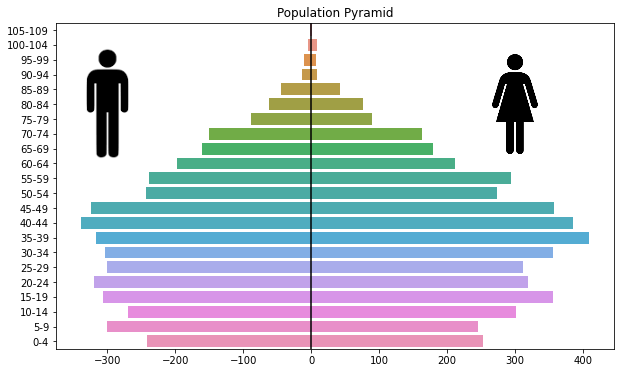

In [134]:
#Let's visualize the distribution of the towm's population
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# read in the images on male and female icon
male_icon = plt.imread('male_icon.JPG')
female_icon = plt.imread('female_icon_2.JPG')

# create the offsetbox for the male and female icon
img_bx_m = OffsetImage(male_icon, zoom=0.9)
img_bx_f = OffsetImage(female_icon, zoom=0.3)

# create the position of the icons
ab_m = AnnotationBbox(img_bx_m, (-300, 5), frameon=False)
ab_f = AnnotationBbox(img_bx_f, (300, 5), frameon=False)

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=list(male_pop_grp.index), x=list(male_pop_grp.values), ax=ax, order=male_pop_grp.index[::-1])
sns.barplot(y=list(female_pop_grp.index), x=list(female_pop_grp.values), ax=ax, order=male_pop_grp.index[::-1])
ax.axvline(x=0, ymin=0, ymax=1, c="black")
ax.add_artist(ab_m)
ax.add_artist(ab_f)
ax.set_title("Population Pyramid")
plt.show()

From the pyramid chart, It can be seen that Middle Aged populace are the most populous. While pyramid shows that the population is increasing but starts to decline towards old age.

## Generating Houseold Density

We need to determine how many houses are in the town and how many people live in each house

In [135]:
data_file.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Age_group'],
      dtype='object')

In [136]:
#To generate the number of Houses we will need to use the house number and street number
data_file.groupby(['House Number','Street']).count().head(20)

First Name  Surname  Age  \
House Number Street                                        
1            Aethelred Corner            1        1    1   
             Apricotbox Avenue           5        5    5   
             Armstrong Street            1        1    1   
             Bailey Branch               4        4    4   
             Baker Branch                1        1    1   
             Beech Lake                  2        2    2   
             Begum Ridges                4        4    4   
             Bell Gardens                3        3    3   
             Blackdike Street            1        1    1   
             Bright Avenue               1        1    1   
             Brightloop Lane             1        1    1   
             Brooks Ridges               2        2    2   
             Brown Road                  1        1    1   
             Bulldog Drive               4        4    4   
             Bumblebee Lane              1        1    1   
             Butler Extensions           1        1    1   
             Calendar Coves              1        1    1   
             Capricorn House             5        5    5   
             Cardiff Lane                4        4    4   
             Castorshy Drive             4        4    4   

                                Relationship to Head of House  Marital Status  \
House Number Street                                                             
1            Aethelred Corner                               1               1   
             Apricotbox Avenue                              5               5   
             Armstrong Street                               1               1   
             Bailey Branch                                  4               4   
             Baker Branch                                   1               1   
             Beech Lake                                     2               2   
             Begum Ridges                                   4               4   
             Bell Gardens                                   3               3   
             Blackdike Street                               1               1   
             Bright Avenue                                  1               1   
             Brightloop Lane                                1               1   
             Brooks Ridges                                  2               2   
             Brown Road                                     1               1   
             Bulldog Drive                                  4               4   
             Bumblebee Lane                                 1               1   
             Butler Extensions                              1               1   
             Calendar Coves                                 1               1   
             Capricorn House                                5               5   
             Cardiff Lane                                   4               4   
             Castorshy Drive                                4               4   

                                Gender  Occupation  Infirmity  Religion  \
House Number Street                                                       
1            Aethelred Corner        1           1          1         1   
             Apricotbox Avenue       5           5          5         5   
             Armstrong Street        1           1          1         1   
             Bailey Branch           4           4          4         4   
             Baker Branch            1           1          1         1   
             Beech Lake              2           2          2         2   
             Begum Ridges            4           4          4         4   
             Bell Gardens            3           3          3         3   
             Blackdike Street        1           1          1         1   
             Bright Avenue           1           1          1         1   
             Brightloop Lane

In [137]:
#Lets make a new column for Household Density
Household_Density = data_file.groupby(['House Number','Street'])[['Gender']].count()
Household_Density.shape

(3384, 1)

This means there are 3384 Households in the town 

<AxesSubplot:>

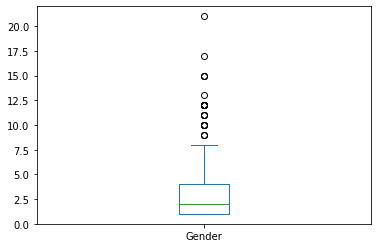

In [138]:
Household_Density.plot(kind='box')

In [139]:
Household_Density.head()

Gender
House Number Street                   
1            Aethelred Corner        1
             Apricotbox Avenue       5
             Armstrong Street        1
             Bailey Branch           4
             Baker Branch            1

In [140]:
Household_Density.reset_index()
Household_Density.head()

Gender
House Number Street                   
1            Aethelred Corner        1
             Apricotbox Avenue       5
             Armstrong Street        1
             Bailey Branch           4
             Baker Branch            1

In [141]:
#Let's rename the column to House Density
Household_Density.rename(columns={'Gender':'House Density'}, inplace=True)

<AxesSubplot:>

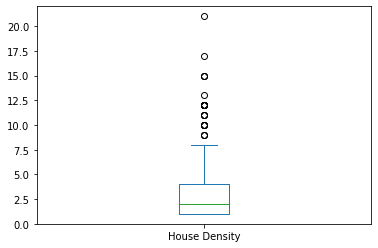

In [142]:
Household_Density.plot(kind='box')

In [143]:
Household_Density.describe()

House Density
count    3384.000000
mean        2.623522
std         1.663395
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        21.000000

In [144]:
#Let's merge Household Density with data_file
data_file = pd.merge(data_file,Household_Density,on=['House Number','Street'],how='outer')

In [145]:
data_file.head()

House Number       Street First Name         Surname  Age  \
0             1  Garner Fork    Carolyn          Murray   52   
1             1  Garner Fork       Kyle          Murray   53   
2             1  Garner Fork    Suzanne  Elliott-Murray   24   
3             2  Garner Fork      Naomi          Archer   34   
4             2  Garner Fork     Martin          Barnes   36   

  Relationship to Head of House Marital Status  Gender             Occupation  \
0                          Head        Married  Female                Unknown   
1                       Husband        Married    Male    Immigration officer   
2                      Daughter         Single  Female  Merchant navy officer   
3                          Head         Single  Female  Merchant navy officer   
4                       Partner         Single    Male         Futures trader   

  Infirmity   Religion Age_group  House Density  
0      None  Christian     50-54              3  
1      None  Christian     50-54              3  
2      None  Christian     20-24              3  
3      None    Unknown     30-34              2  
4      None    Unknown     35-39              2

In [146]:
#The 100% percentile of Household hold 8 people, let's glance through the houses that have more than 8 occupants
data_file[data_file['House Density']>8].sample(10)

House Number               Street First Name         Surname  Age  \
368             28    Apricotbox Avenue       Sean  Richards-Ellis   24   
5958            27        James Station       Toby        Harrison   18   
8837             1  Strawberry Fortress     Donald           Singh    9   
317             22    Apricotbox Avenue     Norman         Stewart   16   
362             28    Apricotbox Avenue       Owen           Ellis   42   
322             22    Apricotbox Avenue        Amy          Butler   52   
225              9    Apricotbox Avenue       Adam           Davis   20   
326             22    Apricotbox Avenue    Suzanne            Cole   63   
6272            12           Unity Lane      Ricky         Johnson   39   
6007            32        James Station      Debra           Baker   53   

     Relationship to Head of House Marital Status  Gender  \
368                            Son         Single    Male   
5958                          None         Single    Male   
8837                           Son          Minor    Male   
317                            Son          Minor    Male   
362                            Son         Single    Male   
322                         Lodger         Single  Female   
225                            Son         Single    Male   
326                        Sibling         Single  Female   
6272                           Son         Single    Male   
6007                      Daughter       Divorced  Female   

                  Occupation Infirmity   Religion Age_group  House Density  
368                Dietitian      None    Unknown     20-24             12  
5958                 Student      None    Unknown     15-19             10  
8837                 Student      None    Unknown       5-9             12  
317                  Student      None    Unknown     15-19             12  
362           Chief of Staff      None    Unknown     40-44             12  
322   Chief Strategy Officer      None  Christian     50-54             12  
225       University Student      None    Unknown     20-24             15  
326            Archaeologist      None  Christian     60-64             12  
6272              Unemployed      None     Muslim     35-39             10  
6007     Hospital pharmacist      None  Christian     50-54             21

In [147]:
#How many households are above 8 inhabitants
data_file[data_file['House Density']>8].shape

(325, 13)

In [148]:
#out of 3384 homes, how many are owned by students?
data_file[(data_file['Relationship to Head of House']=='Head') & (data_file['Occupation'].str.contains('student',case=False))].sample()

House Number        Street First Name Surname  Age  \
3979            46  Station Road     Andrew   Sharp   20   

     Relationship to Head of House Marital Status Gender          Occupation  \
3979                          Head         Single   Male  University Student   

     Infirmity   Religion Age_group  House Density  
3979      None  Christian     20-24              2

In [149]:
data_file[(data_file['Relationship to Head of House']=='Head') & (data_file['Occupation'].str.contains('student',case=False))].shape

(176, 13)

In [150]:
data_file[(data_file['Relationship to Head of House']=='None') & (data_file['Occupation'].str.contains('student',case=False))].shape

(185, 13)

In [151]:
data_file[(data_file['Relationship to Head of House']=='Lodger') & (data_file['Occupation'].str.contains('student',case=False))].shape

(26, 13)

In [152]:
data_file['Occupation'].unique()

array(['Unknown', 'Immigration officer', 'Merchant navy officer',
       'Futures trader', 'Retired', 'Learning mentor',
       'Engineer, biomedical', 'Public affairs consultant', 'Optometrist',
       'Police officer', 'Student', 'Architectural technologist',
       'Surveyor, rural practice', 'Unemployed',
       'Special educational needs teacher', 'Industrial/product designer',
       'Fish farm manager', 'Therapist, nutritional', 'Science writer',
       'Administrator, charities/voluntary organisations',
       'University Student', 'Quarry manager', 'Retail merchandiser',
       'Media planner', 'Occupational hygienist', 'Network engineer',
       'Animal technologist', 'Sales promotion account executive',
       'Medical illustrator', 'Child', 'Dramatherapist',
       'Patent examiner', 'Designer, blown glass/stained glass',
       'Chartered public finance accountant', 'Psychologist, counselling',
       'Financial manager', 'Surveyor, planning and development',
       'Publi

In [153]:
#lecturer, medical,special ed needs

## Religion

In [154]:
data_file['Religion'].unique()

array(['Christian', 'Unknown', 'Muslim', 'Sikh', 'Jewish', 'Bahai',
       'Hindu'], dtype=object)

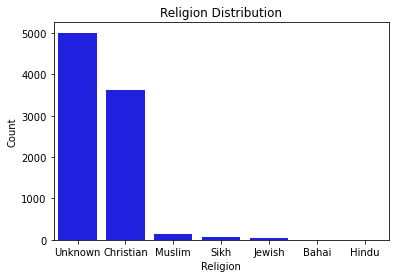

In [155]:
# religion distribution
religion_count = data_file['Religion'].value_counts()
x = list(religion_count.index)
y = list(religion_count.values)

sns.barplot(x=x, y=y, color='b')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.title("Religion Distribution")
plt.show()

In [156]:
religion_count

Unknown      5006
Christian    3633
Muslim        130
Sikh           65
Jewish         40
Bahai           2
Hindu           2
Name: Religion, dtype: int64

As we want to make decisions concerning the Religious growth or decline in the town, we can drop the Unknown 

<AxesSubplot:>

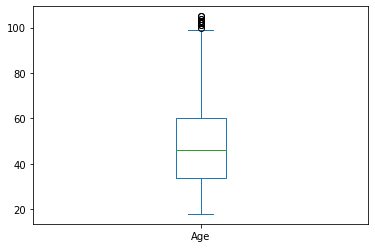

In [157]:
data_file[data_file['Religion']=='Christian'][['Age']].plot(kind='box')

<AxesSubplot:>

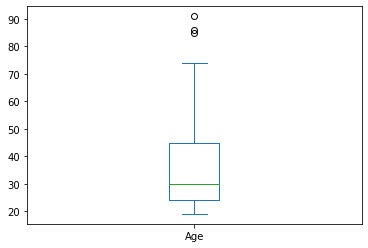

In [158]:
data_file[data_file['Religion']=='Muslim'][['Age']].plot(kind='box')

In [159]:
data_file[data_file['Religion']=='Christian'].describe()

House Number          Age  House Density
count   3633.000000  3633.000000    3633.000000
mean      41.036058    47.623176       3.401872
std       47.004090    18.049439       2.315033
min        1.000000    18.000000       1.000000
25%       10.000000    34.000000       2.000000
50%       23.000000    46.000000       3.000000
75%       50.000000    60.000000       4.000000
max      236.000000   105.000000      21.000000

In [160]:
data_file[data_file['Religion']=='Muslim'].describe()

House Number         Age  House Density
count    130.000000  130.000000     130.000000
mean      41.323077   36.600000       3.915385
std       47.469813   16.699626       3.244637
min        1.000000   19.000000       1.000000
25%        8.000000   24.000000       2.000000
50%       18.000000   30.000000       3.000000
75%       53.750000   44.750000       4.000000
max      213.000000   91.000000      15.000000

## Old Age Care


In [161]:
#we are only concerned about retirement age of 65 and up
old_data = data_file[data_file['Age']>=65]

In [162]:
old_data.shape

(1111, 13)

In [163]:
#what is the maximum age 
old_data['Age'].max()

105

In [164]:
#checking
old_data.head()

House Number       Street First Name   Surname  Age  \
5              3  Garner Fork     Leanne    Murphy   71   
9              5  Garner Fork     George  Johnston   82   
16             8  Garner Fork      Abdul      Reed   70   
17             9  Garner Fork      Lynne    Steele   75   
18            10  Garner Fork      Molly      Ward   66   

   Relationship to Head of House Marital Status  Gender Occupation Infirmity  \
5                           Head         Single  Female    Retired      None   
9                           Head        Widowed    Male    Retired      None   
16                          Head        Widowed    Male    Retired      None   
17                          Head        Widowed  Female    Retired      None   
18                          Head       Divorced  Female    Retired      None   

     Religion Age_group  House Density  
5   Christian     70-74              1  
9   Christian     80-84              1  
16    Unknown     70-74              1  
17  Christian     75-79              1  
18  Christian     65-69              1

In [165]:
old_data['Age_group'].unique()

['70-74', '80-84', '75-79', '65-69', '85-89', '105-109', '90-94', '95-99', '100-104']
Categories (22, object): ['0-4' < '5-9' < '10-14' < '15-19' ... '90-94' < '95-99' < '100-104' < '105-109']

In [166]:
old_data[old_data['Age_group'].isnull()]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age_group, House Density]
Index: []

In [167]:
counts = old_data[old_data['Age']>=65]['Age_group'].value_counts().sort_index()


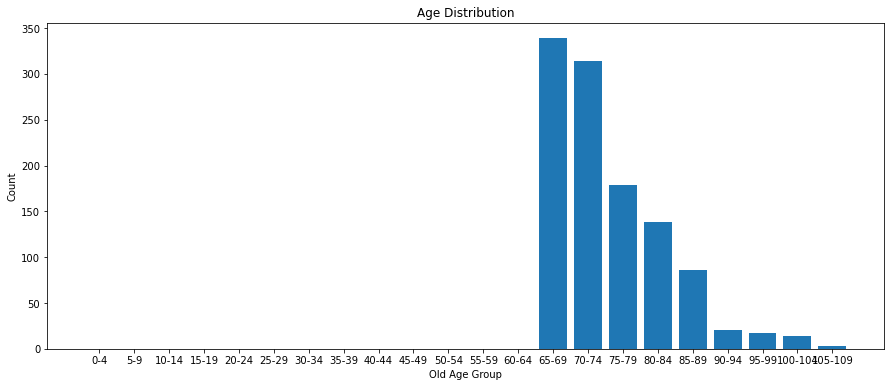

In [168]:
plt.figure(figsize=(15, 6))
plt.bar(counts.index, counts.values)
plt.title('Age Distribution')
plt.xlabel('Old Age Group')
plt.ylabel('Count')
plt.show()

In [169]:
data_file.shape

(8878, 13)

Out of 8878 people in the census, 1111 of them are of retirement age and above.

In [170]:
(1111/8878)*100

12.514079747690921

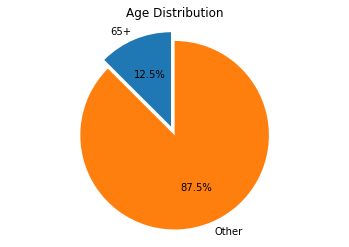

In [171]:
#Let's try to visualise it
copy_data = data_file
#create a new column for 65 or not
copy_data['65 or not'] = ['65+' if age >= 65 else 'Other' for age in copy_data['Age']]
#group and count according to 65 or not
old_or_not = copy_data.groupby('65 or not')['Age'].count().reset_index(name='count')
#make a piechart to reflect this
labels = old_or_not['65 or not']
sizes = old_or_not['count']

# Explode the 65+ part
explode = (0.1 if '65+' in labels.values else 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('Age Distribution')
plt.show()

In [172]:
#the average age to go to a retirement home is 83 - 85 years and a median life expectancy of 80 - 81 years
old_data[old_data['Age']>=80].shape


(279, 13)

In [173]:
#On average do these old people live alone or with family that can take care of themselves
old_data[old_data['Age']>=80]['House Density'].mean()

2.050179211469534

In [174]:
old_data[old_data['Age']>=80][['House Density']].describe()

House Density
count     279.000000
mean        2.050179
std         2.049125
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        17.000000

<AxesSubplot:>

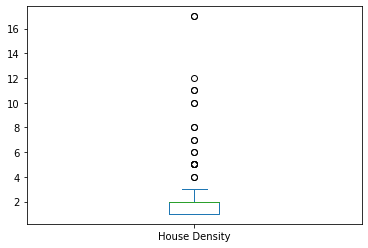

In [175]:
old_data[old_data['Age']>=80][['House Density']].plot(kind='box')

In [176]:
old_data[old_data['Age']>=80][['House Density']].value_counts().sort_index()

House Density
1                115
2                138
3                  6
4                  2
5                  5
6                  2
7                  2
8                  2
10                 2
11                 2
12                 1
17                 2
dtype: int64

In [177]:
old_data[(old_data['Age']>=80) & (old_data['House Density']==1)]['Marital Status'].value_counts()

Widowed     82
Single      17
Divorced    16
Name: Marital Status, dtype: int64

In [178]:
old_data[(old_data['Age']>=80) & (old_data['House Density']==2)]['Marital Status'].value_counts()

Married     135
Widowed       2
Divorced      1
Name: Marital Status, dtype: int64

In [179]:
old_data[(old_data['Age']>=80) & (old_data['House Density']<=2)].shape

(253, 13)

## Unemployment

In [180]:
unemployed_file = data_file[data_file['Occupation']=='Unemployed']

In [181]:
#Calculate Unemployment number
unemployed_file.shape

(549, 14)

In [182]:
#Confirming if the age of Unemployed people is within the range of 18 and 65
unemployed_file[(unemployed_file['Age']>=18) & (unemployed_file['Age']<65) ].shape

(546, 14)

In [183]:
#what is the population of working adults?
data_file[(data_file['Age']>=16) & (data_file['Age']<65)].shape

(6026, 14)

In [184]:
#Unemloyment rate = no of unemployed/population of working age adults 
546/6026 * 100

9.060736807168935

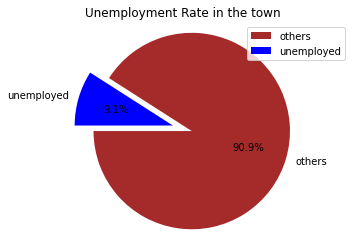

In [186]:
#make a piechart to reflect unemployment
labels = ["others", "unemployed"]
sizes = [90.94, 9.06]

# Explode the 65+ part
explode = (0.2 if 'unemployed' in labels else 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=180, colors=["brown", "blue"])
ax.axis('equal')
plt.legend()
plt.title('Unemployment Rate in the town')
plt.show()

9.1% of the Working Age population is unemployed

## Schools and Children

From Our previous analysis, we discovered that many 18 years still had the occupation of student so their age group will be included in this analysis

In [187]:
children = data_file[data_file['Age']<=18]

In [188]:
#How many children are in the town
children.shape

(2115, 14)

In [189]:
#How many children are in schools as at the point of the census
school = data_file[data_file['Occupation']=='Student']

In [190]:
school.shape

(1577, 14)

In [191]:
#Good, there are no adults above 18
school[school['Age']>18]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age_group, House Density, 65 or not]
Index: []

In [192]:
#How many students are 18?
school[school['Age']==18].shape

(104, 14)

In [193]:
#How many are 18 but not students?
data_file[(data_file['Age']==18) & (data_file['Occupation']!='Student')].shape

(41, 14)

In [194]:
school[school['Age']<5]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age_group, House Density, 65 or not]
Index: []

In [195]:
data_file[(data_file['Age']>=0) & (data_file['Age']<=4)].shape

(494, 14)

In [196]:
#what is the number of children born (0 - 1) in the year of the census
data_file[(data_file['Age']>=0) & (data_file['Age']<=1)].shape

(181, 14)

There were 181 children born in the last year in the town

In [197]:
#Out of 8878 people, calculate the crude birth rate
Crude_Birth_Rate = (181/8878)*1000
Crude_Birth_Rate 

20.387474656454156

Crude Birth Rate is 20 births per 1000 people

## Population and Housing

In [198]:
counts = data_file['Age_group'].value_counts().sort_index()
counts

0-4        494
5-9        546
10-14      571
15-19      662
20-24      638
25-29      612
30-34      659
35-39      724
40-44      723
45-49      681
50-54      516
55-59      532
60-64      409
65-69      339
70-74      314
75-79      179
80-84      138
85-89       86
90-94       21
95-99       17
100-104     14
105-109      3
Name: Age_group, dtype: int64

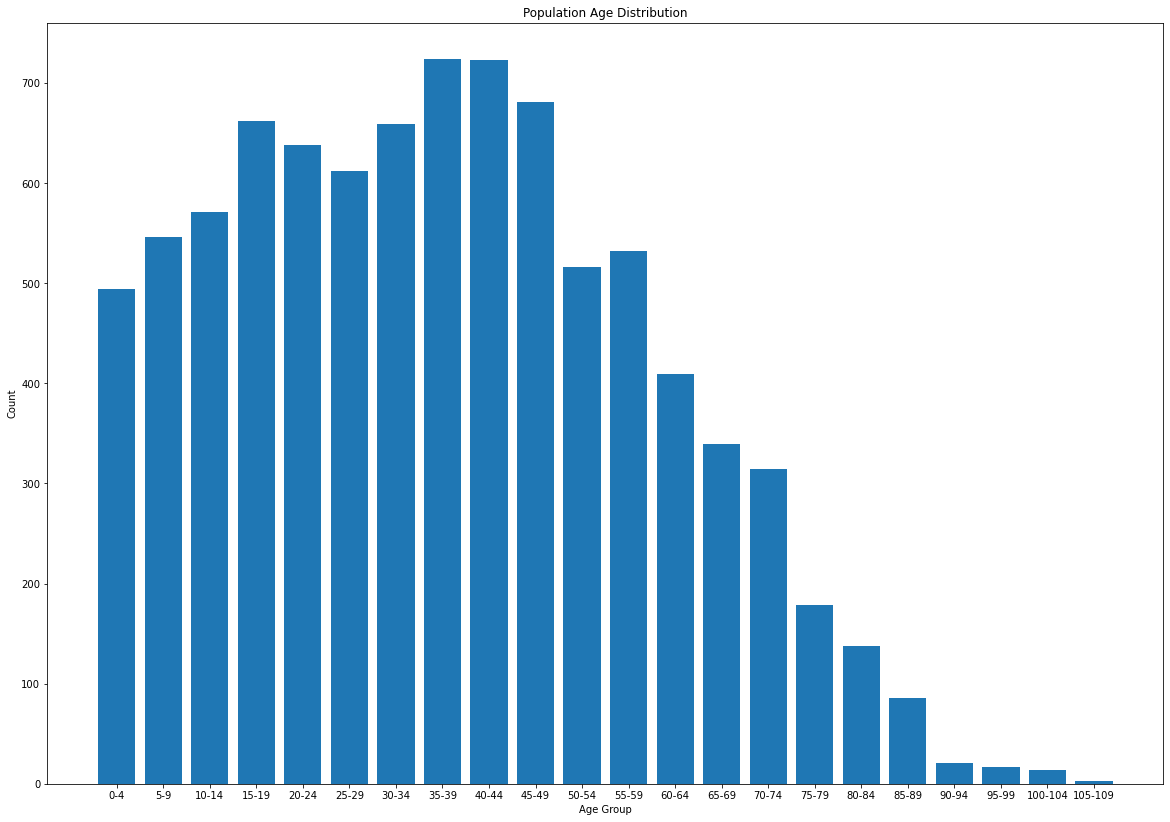

In [199]:
plt.figure(figsize=(20,14))
plt.bar(counts.index, counts.values)
plt.title('Population Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [200]:
#Calculating the number of Deaths across the Age_groups from 65 - 105
(339 - 314) + (314 -179) + (179-138) + (138-86) +(86-21)+ (21-17)+ (17-14)+ (14-3)

336

In [201]:
336/5

67.2

In [202]:
#Calculating the Crude Death
67.2/8878 * 1000

7.569272358639334

Crude Death Rate is 7.57 deaths per thousand

In [203]:
#How many lodgers?
lodgers = data_file[data_file['Relationship to Head of House']=='Lodger']
lodgers.shape

(295, 14)

295 lodgers

In [204]:
#How many visitors?
data_file[data_file['Relationship to Head of House']=='Visitor'].shape

(16, 14)

16 visitors

In [205]:
#How many None relationships with House density>2?
Non = data_file[(data_file['Relationship to Head of House']=='None') & (data_file['House Density']>2)]
Non = Non[Non['Occupation']!='University Student']

In [206]:
Non.shape

(406, 14)

This is for None Relationships that are likely to have families as their numbers if you include the Head of House will surpass 2 in number. They must also not be University Students

In [207]:
#How many new Uni Students
new = data_file[(data_file['Age']>17) & (data_file['Age']<20)]
new[new['Occupation']=='University Student'].shape


(186, 14)

In [208]:
#How many old Uni Students?
old = data_file[(data_file['Age']>20) & (data_file['Age']<24)]
old[old['Occupation']=='University Student'].shape

(280, 14)

In [209]:
#Net number students in the town
186+(-280)

-94

This proves that more University Students leave the town than they come in every year

In [210]:
#Lodgers and None relationships
535 + 295

830

That means at least 830 people need new housing

In [211]:
housing = pd.concat([Non, lodgers], axis=0)

In [212]:
housing['Marital Status'].value_counts()

Single      598
Divorced     76
Widowed      12
Married      10
Minor         5
Name: Marital Status, dtype: int64

## Commuters, the Employed and Transportation

In [213]:
len(data_file['Occupation'].unique())

644

In [214]:
data_file['Occupation'].nunique()

644

In [215]:
data_file[data_file['Occupation'].str.contains('student',case=False)]['Occupation'].unique()

array(['Student', 'University Student', 'PhD Student'], dtype=object)

In [216]:
#How many Uni Students?
data_file[data_file['Occupation']=='University Student'].shape

(592, 14)

In [217]:
#How many PhD Students?
data_file[data_file['Occupation']=='PhD Student'].shape

(20, 14)

In [218]:
#There is no hospital to hire Doctors so they can't be employed in the town
data_file[data_file['Occupation'].str.contains('doctor',case=False)]['Occupation'].unique()

array(['Hospital doctor', 'General practice doctor', 'Doctor, hospital',
       'Doctor, general practice'], dtype=object)

In [219]:
data_file[data_file['Occupation'].str.contains('doctor',case=False)].shape

(31, 14)

In [220]:
#let's look at a sample of the Working Age population 
data_file[(data_file['Age']>17) & (data_file['Age']<65)].shape

(5797, 14)

In [221]:
#Let's remove any potential highschool students from there
working_age = data_file[(data_file['Age']>17) & (data_file['Age']<65)]
student_free = working_age[working_age['Occupation']!='Student']

In [222]:
student_free.shape

(5693, 14)

In [223]:
#Let's remove unemployed people from there
#unemployed_free = 
student_free[student_free['Occupation']!='Unemployed']

House Number               Street   First Name             Surname  Age  \
0                1          Garner Fork      Carolyn              Murray   52   
1                1          Garner Fork         Kyle              Murray   53   
2                1          Garner Fork      Suzanne      Elliott-Murray   24   
3                2          Garner Fork        Naomi              Archer   34   
4                2          Garner Fork       Martin              Barnes   36   
6                4          Garner Fork        Jemma             Pearson   28   
7                4          Garner Fork       Joshua             Pearson   30   
8                4          Garner Fork      Kathryn              Taylor   28   
10               6          Garner Fork      Harriet               Stone   48   
11               6          Garner Fork      Jeffrey         Stone-Marsh   51   
13               7          Garner Fork        Carol                Ward   45   
14               7          Garner Fork         Joel                Ward   50   
15               7          Garner Fork        Aaron                Ward   25   
20              12          Garner Fork        Conor               Joyce   35   
21              12          Garner Fork         Gail               Joyce   33   
22              12          Garner Fork       Damien               Mason   23   
24              14          Garner Fork         Gail              Parker   60   
25              15          Garner Fork         Eric                Gray   23   
26              16          Garner Fork       Pamela               Smith   62   
27              17          Garner Fork      Rachael                Webb   38   
32               1      Brightloop Lane        Kevin              Davies   21   
38               6      Brightloop Lane      Harriet               Power   26   
39               6      Brightloop Lane    Christine              Norris   44   
40               7      Brightloop Lane      Gregory             Edwards   25   
41               7      Brightloop Lane      Kenneth             Edwards   24   
43               1           Beech Lake       Denise             Skinner   35   
46               2           Beech Lake         Ruth               Birch   61   
47               3           Beech Lake         Tony              Morris   19   
48               3           Beech Lake         Gail              Horton   18   
49               3           Beech Lake        Shane               White   19   
50               4           Beech Lake        Kelly             Wallace   52   
52               6           Beech Lake      William              Benson   38   
53               7           Beech Lake       Adrian              Foster   58   
56               2             Todd Row       Philip               Baker   43   
57               2             Todd Row       Judith               Baker   34   
58               3             Todd Row       Sylvia             Simpson   47   
59               3             Todd Row     Benjamin             Simpson   53   
64               4             Todd Row        Donna            Williams   46   
65               4             Todd Row      Bernard            Williams   45   
66               4             Todd Row        Jemma            Williams   41   
67               5             Todd Row     Lawrence              Turner   27   
68               5             Todd Row         Tina              Turner   25   
71               6             Todd Row        Simon            Chandler   41   
72               6             Todd Row       Graham            Chandler   38   
73               1      Goodluck Avenue        Grace               Evans   21   
77               4      Goodluck Avenue      Bernard              Haynes   37   
78               5      Goodluck Avenue        David           Pickering   27   
79               6      Goodluck Avenue         Emma            Reynolds   51   
80               6      Goodluck Aven

In [224]:
#Let's look at a sample of 100 and see what type of commuting is required in their jobs
sample = student_free.sample(100)
sample

House Number              Street   First Name      Surname  Age  \
6960           102     Summer Villages         Rhys        Hayes   61   
6183            16         Oakjar Lane        Hazel        Riley   20   
5136            39       Bright Avenue       Bethan        Marsh   49   
984             35         Mary Center       Albert          Day   34   
6849            62     Summer Villages        Alice        Booth   56   
1878            28       Tamarisk Road       Oliver       Barlow   38   
3323            76     Castorshy Drive        Naomi       Abbott   41   
2795             9      Clark Crescent       Darren        Scott   42   
142             42     Goodluck Avenue          Joe     Williams   30   
7456            64        Moore Island         Beth       Newton   19   
7110           157     Summer Villages       Marion         Rees   62   
4513             1      Swansea Stream        Gavin        Brown   62   
1558            48       Myers Corners     Margaret       Reeves   45   
58               3            Todd Row       Sylvia      Simpson   47   
24              14         Garner Fork         Gail       Parker   60   
1662            16          Iris Vista       Sylvia       Morgan   26   
1518            36       Myers Corners       Marion     Thornton   44   
2325            74          Gray Brook       Pamela         Pugh   19   
8610            22  Mermaidpush Street        Linda        Smith   56   
5753           189    Edinburgh Points        Katie       Howard   51   
3121            17     Castorshy Drive        Grace       Taylor   32   
823             13     Dundee Crescent       Sylvia     O'Connor   29   
1193            12       Parker Avenue        Bryan        Mason   27   
5039             8       Bright Avenue        Karen       Harris   34   
8695             1         Rice Avenue      Shirley      Burrows   41   
3950            37        Station Road     Geoffrey       Little   46   
8248            11  Johnston Underpass       Adrian       Wilson   55   
6326             9        Sydney Drive       Nicole       Ashton   19   
11               6         Garner Fork      Jeffrey  Stone-Marsh   51   
5034             7       Bright Avenue       Nathan       Davies   25   
3949            37        Station Road        Carly       Little   49   
57               2            Todd Row       Judith        Baker   34   
6835            55     Summer Villages        Diana        Baker   40   
794              2     Dundee Crescent      Stephen         Carr   36   
6657            43         Iris Street       Pamela   Williamson   21   
5811           232    Edinburgh Points       Marion      Edwards   40   
1217            22       Parker Avenue    Stephanie        Short   41   
6573            13         Iris Street        Garry     Richards   22   
6250             9          Unity Lane       Jeremy      Elliott   54   
5098            25       Bright Avenue      Francis   Cunningham   34   
1005            43         Mary Center         Leon     Robinson   35   
8247            11  Johnston Underpass         Paul       Cooper   19   
6477            58        Sydney Drive      Dorothy       Parkin   55   
3201            41     Castorshy Drive      Stewart         Wade   19   
8685            12      Webster Spring    Alexandra     Robinson   28   
6066             6    Aethelred Corner         Kate      Francis   44   
5075            18       Bright Avenue     Victoria  Lewis-Smith   42   
485             51        Baker Branch       Daniel        Young   19   
5637           117    Edinburgh Points    Catherine       Newman   45   
7230           202     Summer Villages     Charlene     Phillips   34   
1327            26   Zebratraps Avenue          Tom      Stevens   46   
354             27   Apricotbox Avenue      Pauline       Conway   54   
2380           108          Gray Brook       Hannah      Jackson   45   
3899            16        Station Road      Natalie        Evans

Only a few Occupations like Primary School Teacher, Secondary School Teacher, Fast food restuarant manager and Town Planner seemed to be Occupations that did not need commuting

In [225]:
#How many Unemployed?
sample[sample['Occupation']=='Unemployed'].shape

(16, 14)

Only 9 out of a 100 people had jobs that could be done in a small town and wouldn't require commuting to a city

In [226]:
#Non-commuters + Unemployed
10+9

19

In [227]:
#Commuter percentage
100-19

81

Approximately 81% of the Working Age Population are commuters